In [1]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv("spaceship-titanic/train.csv")

In [3]:
df.head(17)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
len(df)

8693

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
print(df)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

In [7]:
df = df.astype({'Cabin':'string'})

In [8]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split("/", n = -1, expand = True)

In [9]:
df = df.replace('nan', np.nan)

In [10]:
df.head(17)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   string 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   string 
 15  Num           8494 non-null   string 
 16  Side          8494 non-null   string 
dtypes: bool(1), float64(6), object(6), string(4)
memory usage: 1.1+ MB


In [12]:
df[df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0,S
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,B,1,P
15,0012_01,Earth,False,<NA>,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,<NA>,<NA>,<NA>
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False,F,3,P
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False,E,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True,E,597,P
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,F,1892,P
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True,F,1893,P
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True,G,1508,P


In [13]:
cats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck']
conts = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [14]:
for i in cats:
    df[i] = df[i].fillna(df[i].mode()[0])

for i in conts:
    df[i] = df[i].fillna(df[i].mean())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   string 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8693 non-null   string 
 15  Num           8494 non-null   string 
 16  Side          8494 non-null   string 
dtypes: bool(3), float64(6), object(4), string(4)
memory usage: 976.4+ KB


In [16]:
df.head(17)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.000000,0.0,0.000000,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.000000,549.0,44.000000,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.000000,6715.0,49.000000,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.000000,3329.0,193.000000,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.000000,565.0,2.000000,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.000000,291.0,0.000000,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.000000,0.0,0.000000,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.000000,0.0,304.854791,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.000000,216.0,0.000000,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.000000,0.0,0.000000,Erraiam Flatic,True,B,1,P


We explore to see if there is any pattern to the deck, side of the boat, and room number

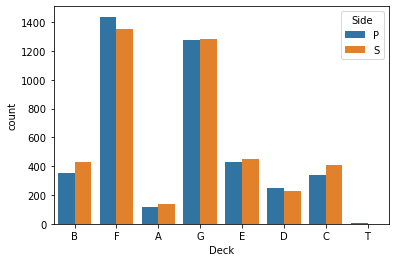

In [17]:
sns.countplot(data = df, x = "Deck", hue = "Side")
plt.show()

In [18]:
f_deck = df[df['Deck'] == 'F']

In [19]:
f_deck['Num'].mode()[0]

'1411'

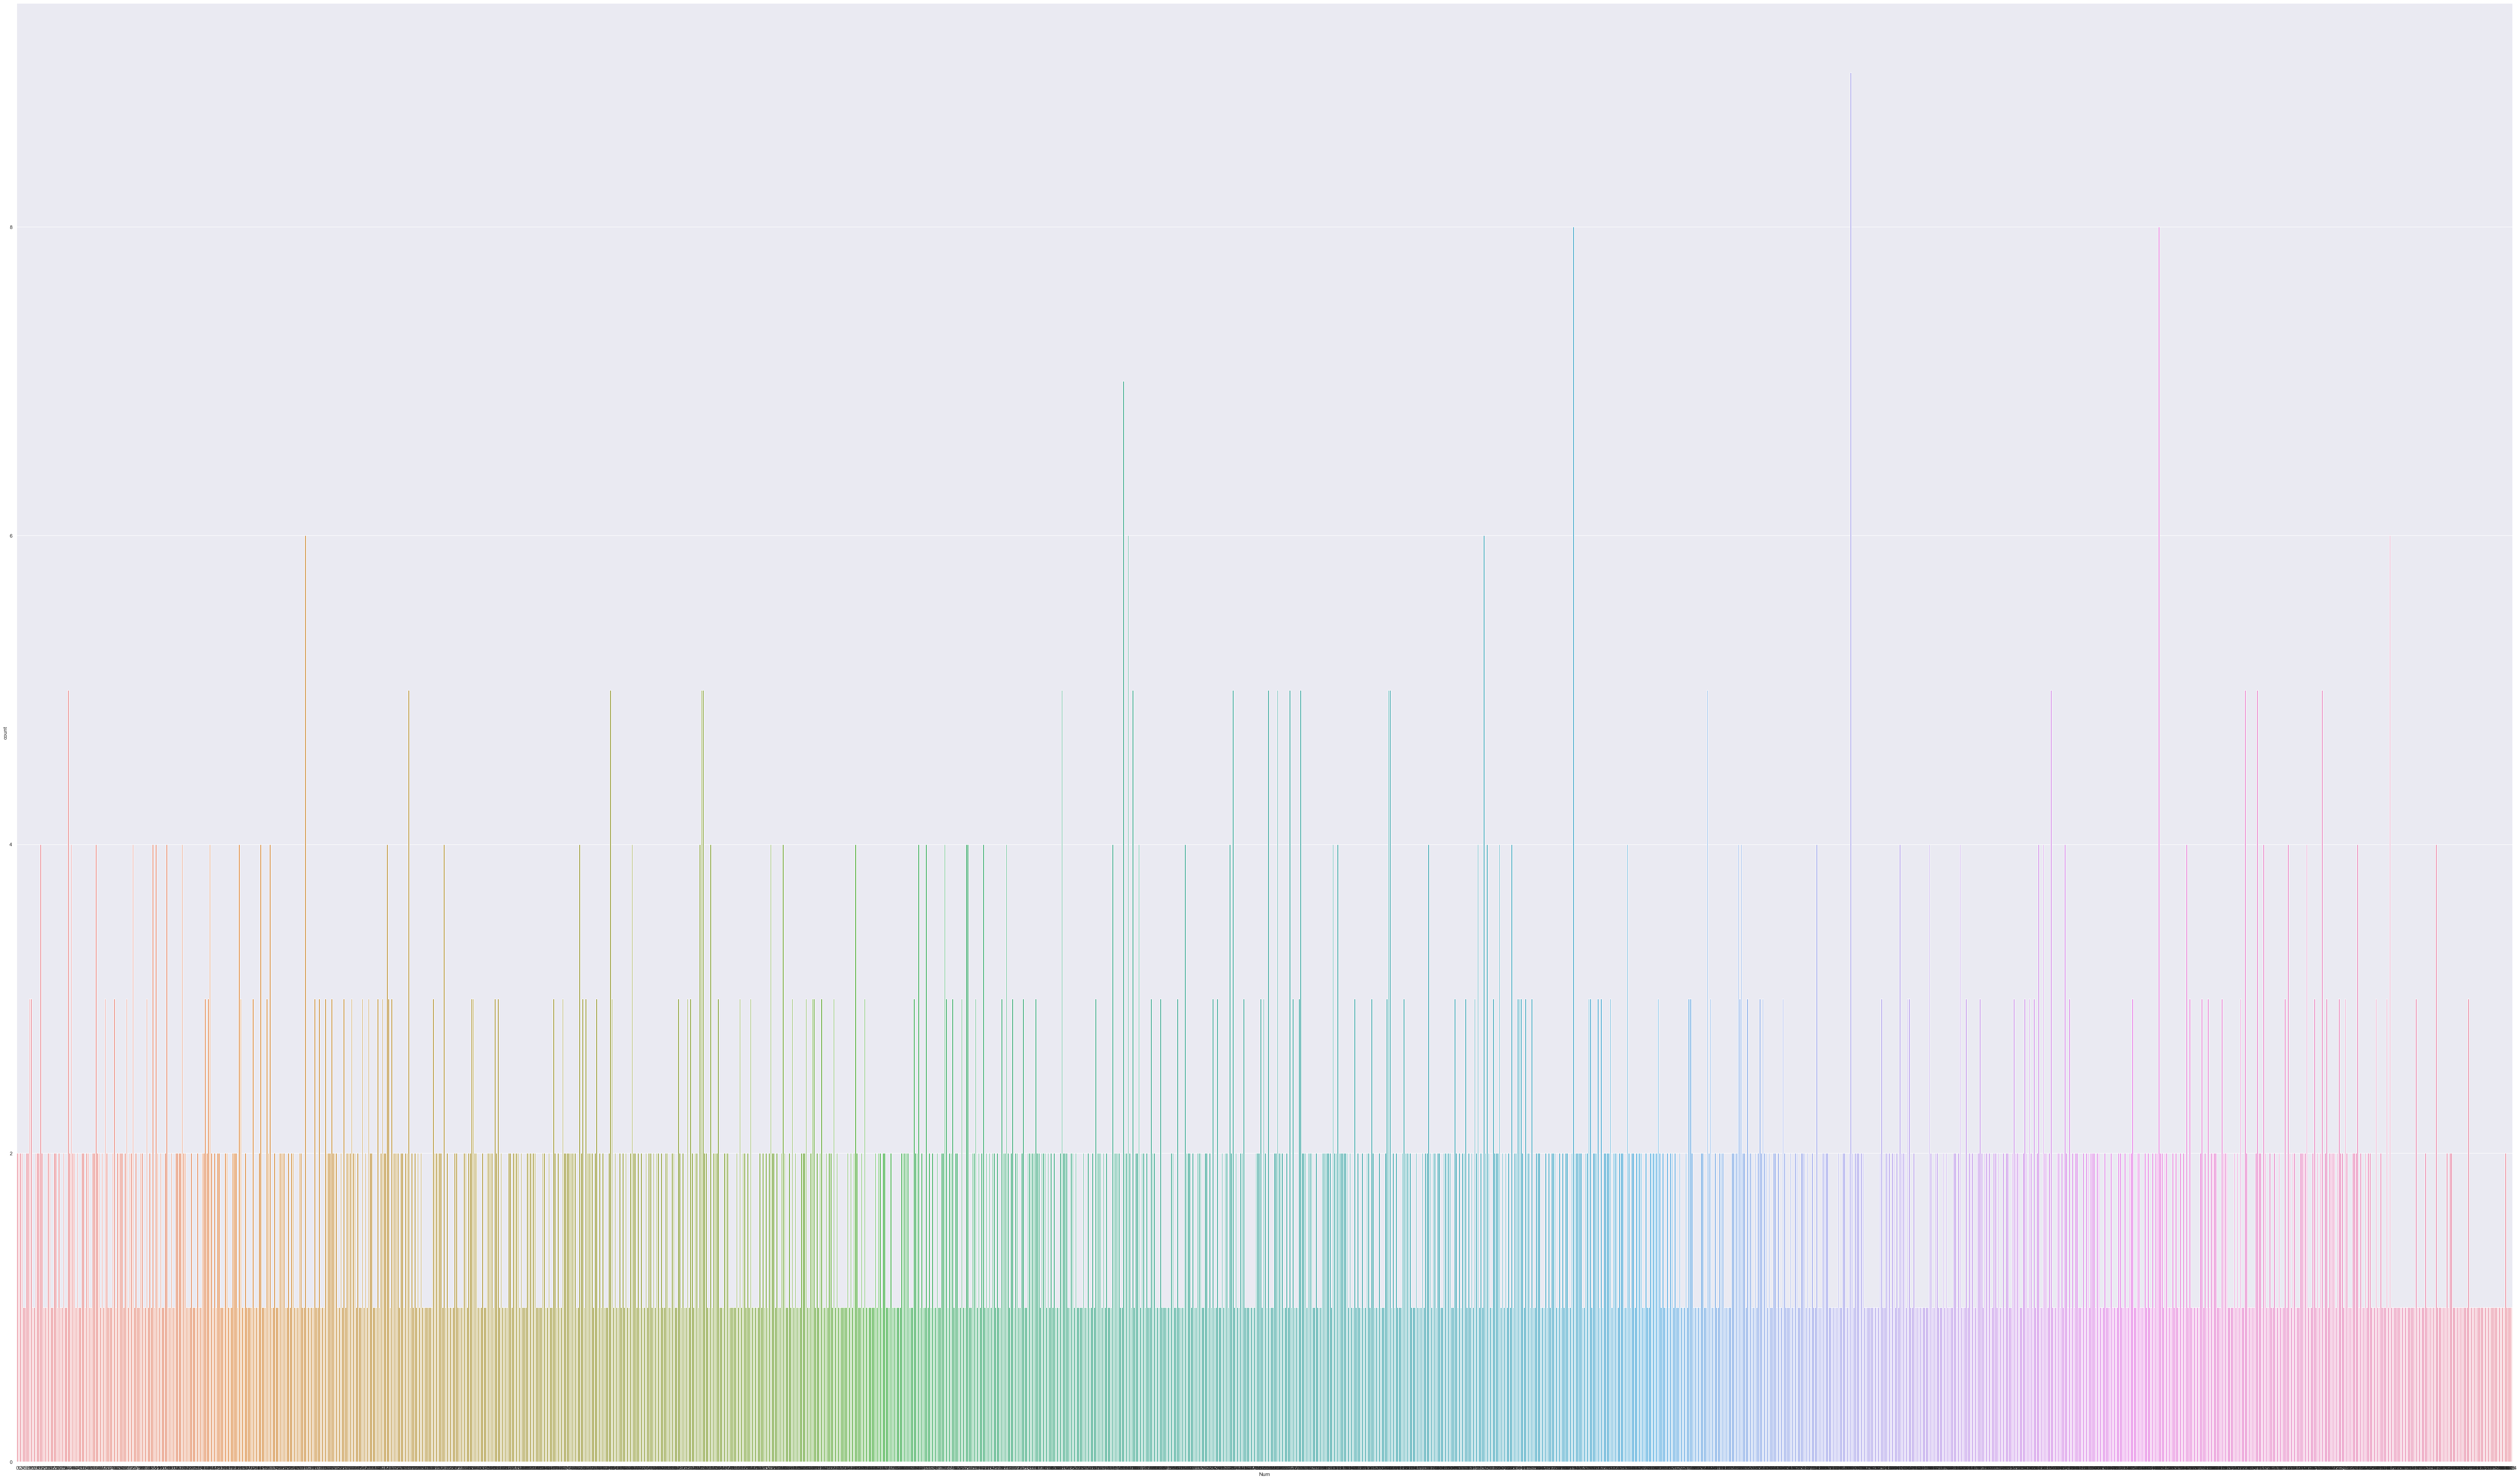

In [20]:
sns.set(rc={'figure.figsize':(100,60)})
sns.countplot(data = f_deck, x = "Num")
plt.show()

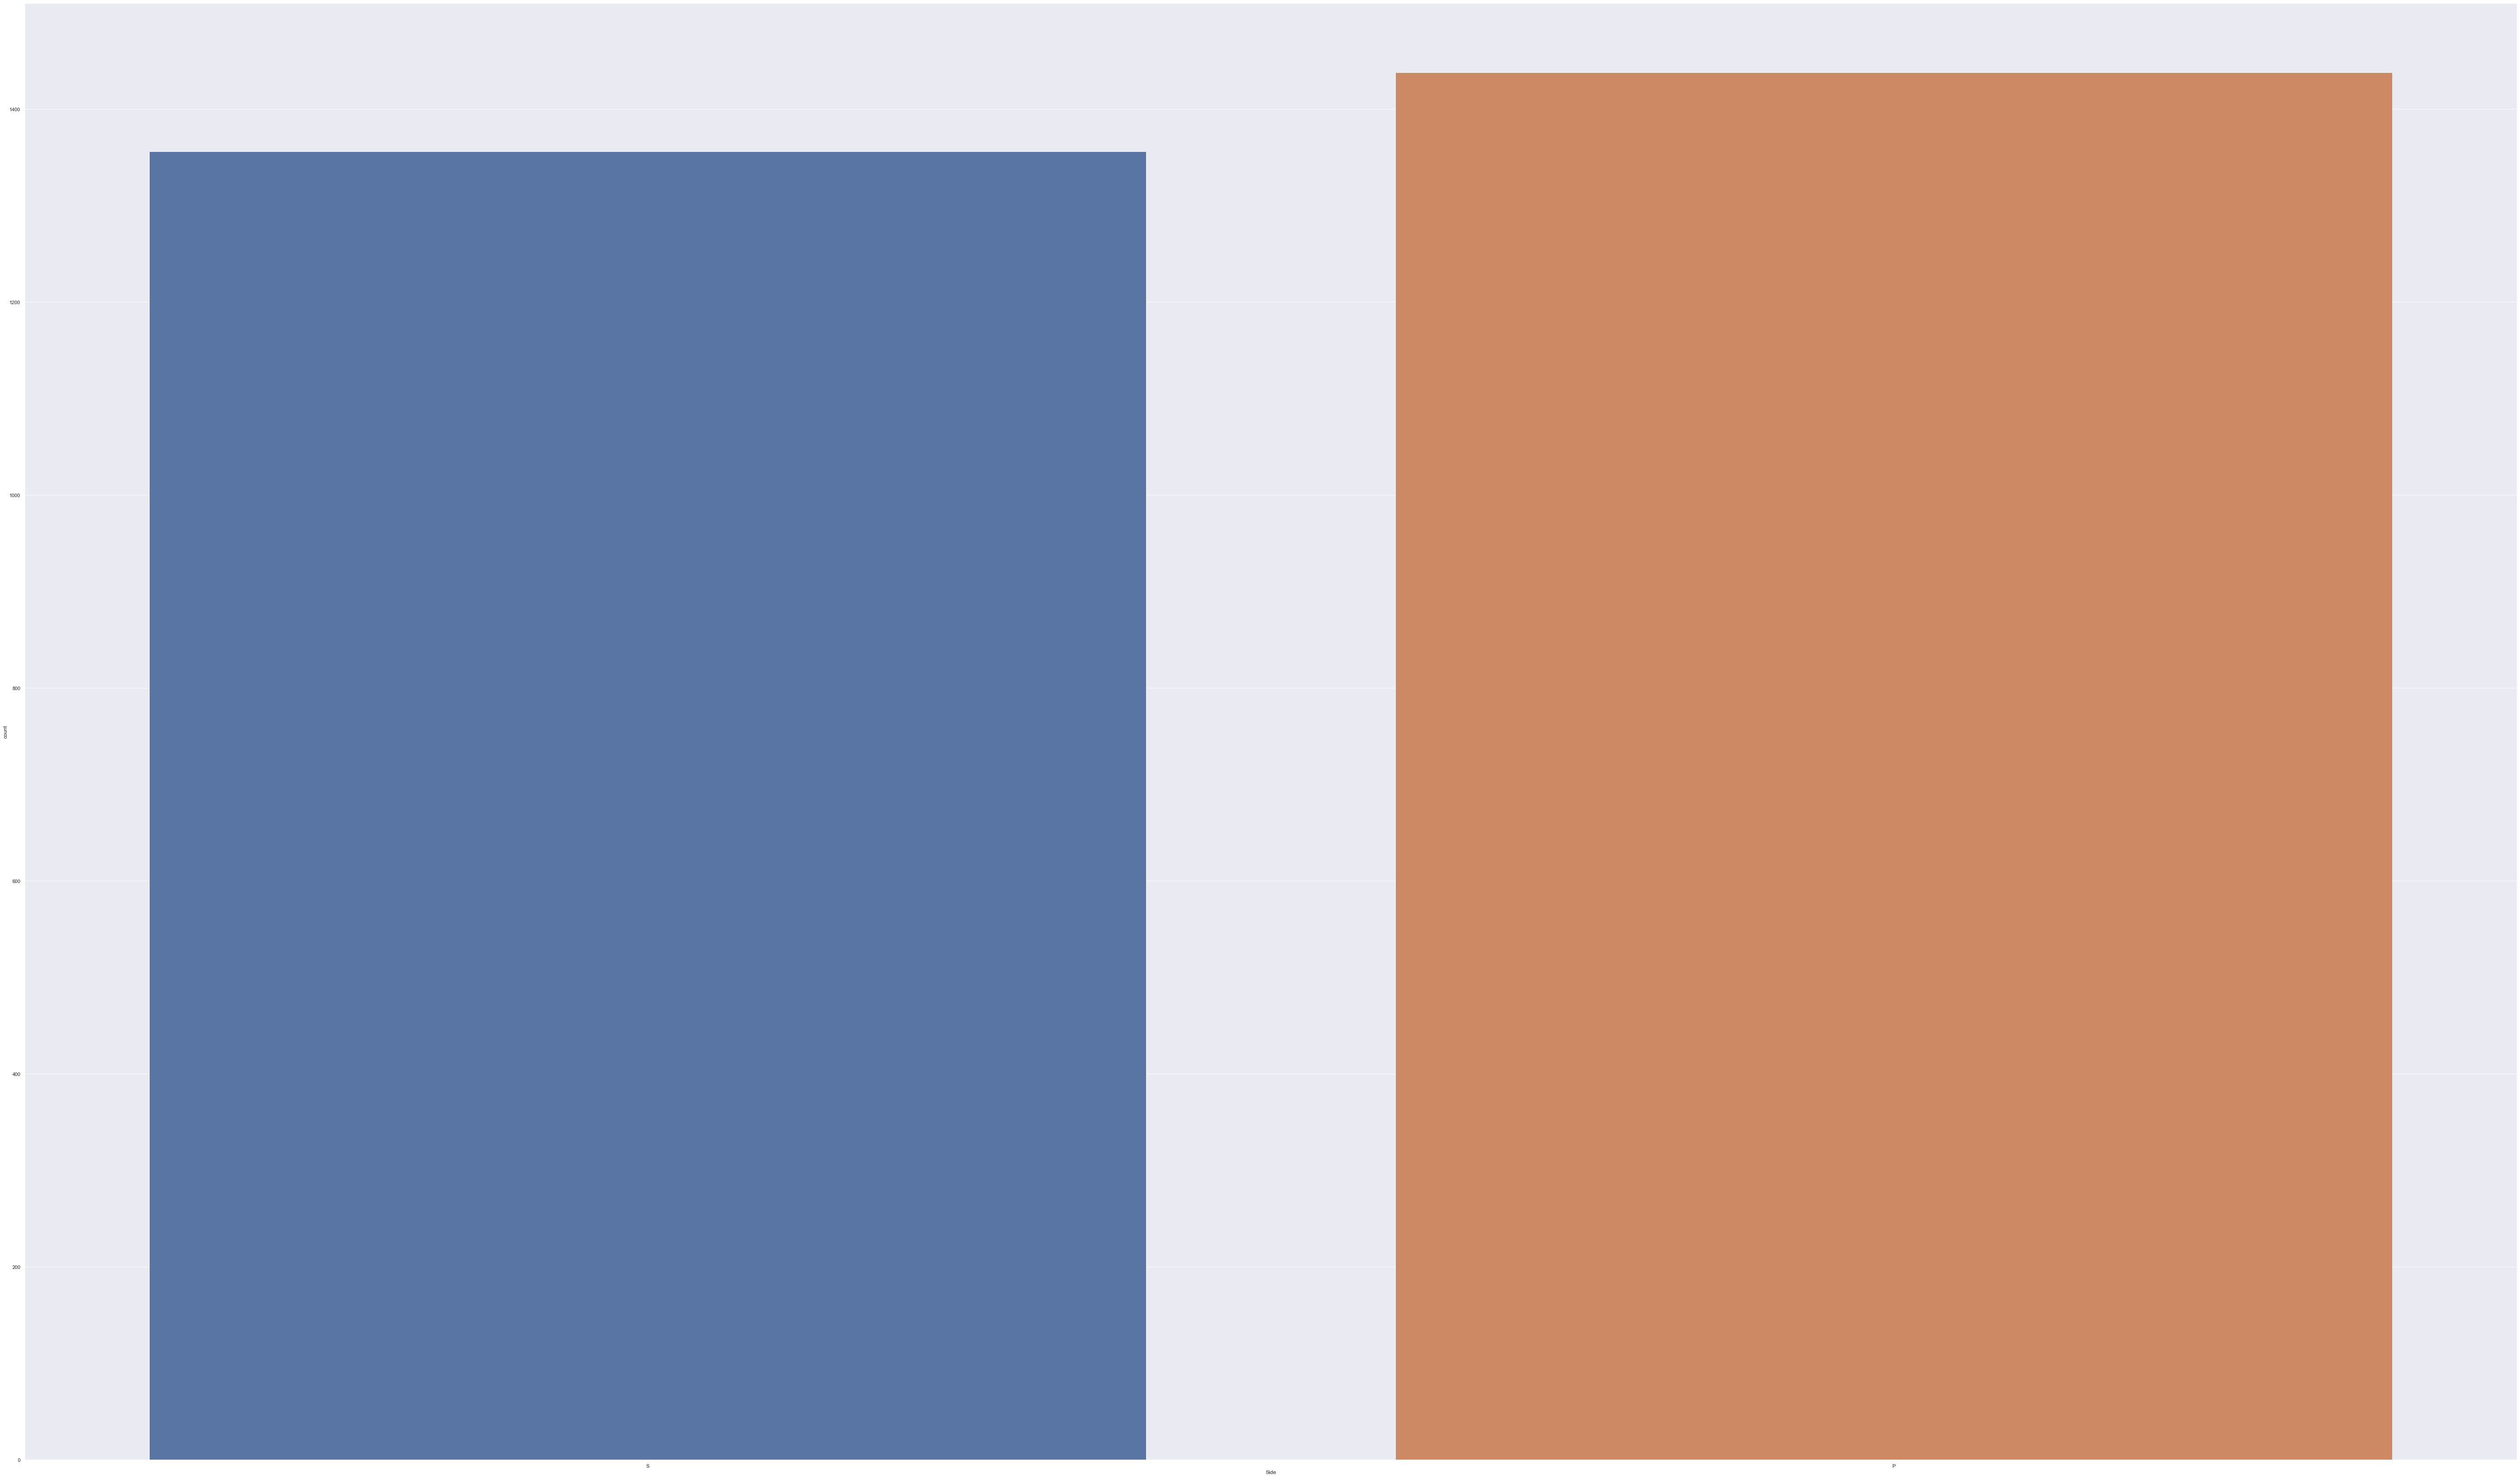

In [21]:
sns.countplot(data = f_deck, x = "Side")
plt.show()

We do not see any pattern, so we will fill in the missing cabin numbers with mode values of F-deck passengers. 

In [22]:
df['Num'] = df['Num'].fillna(f_deck['Num'].mode()[0])
df['Side'] = df['Side'].fillna(f_deck['Side'].mode()[0])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   string 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8693 non-null   string 
 15  Num           8693 non-null   string 
 16  Side          8693 non-null   string 
dtypes: bool(3), float64(6), object(4), string(4)
memory usage: 976.4+ KB


In [24]:
df.head(17)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.000000,0.0,0.000000,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.000000,549.0,44.000000,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.000000,6715.0,49.000000,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.000000,3329.0,193.000000,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.000000,565.0,2.000000,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.000000,291.0,0.000000,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.000000,0.0,0.000000,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.000000,0.0,304.854791,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.000000,216.0,0.000000,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.000000,0.0,0.000000,Erraiam Flatic,True,B,1,P


## Filled all missing categorical variables with mode values and filled all missing numerical variables with mean values. 

In [25]:
df['Transported'].value_counts() #Pretty balanced

True     4378
False    4315
Name: Transported, dtype: int64

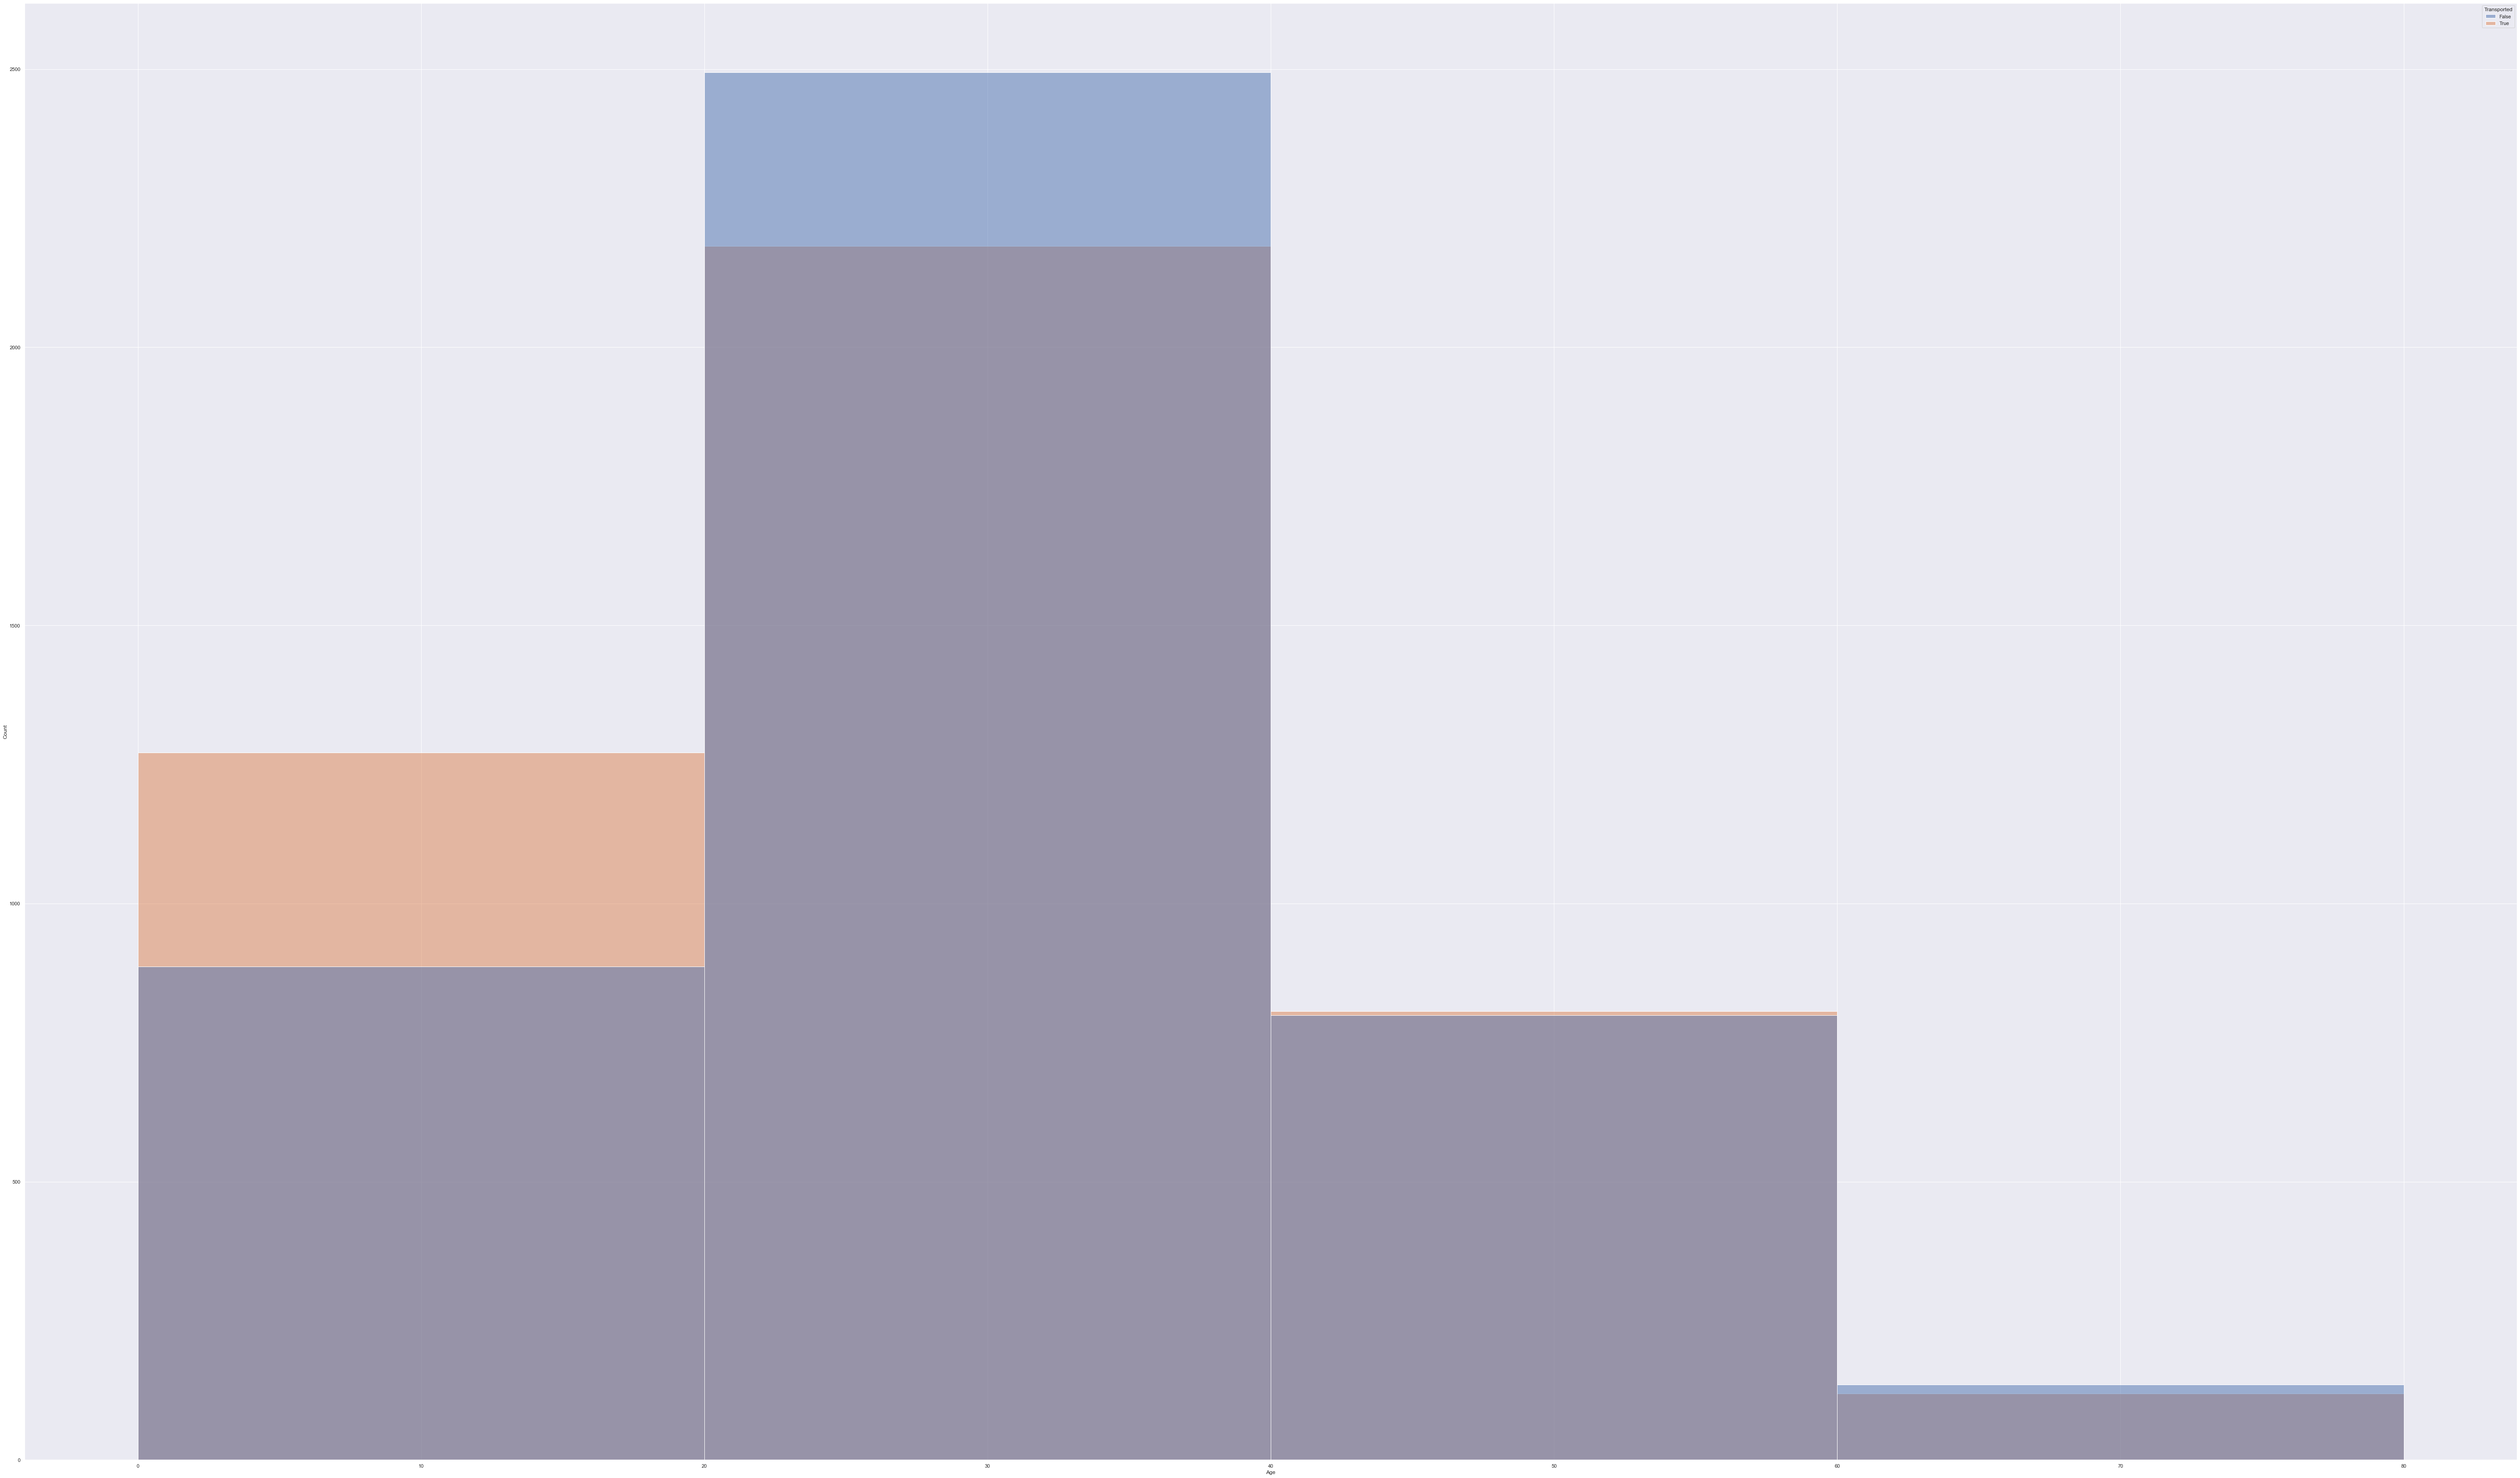

In [26]:
sns.histplot(data = df, x = "Age", hue = "Transported", stat = 'count', binwidth = 20, legend = True)
plt.show()

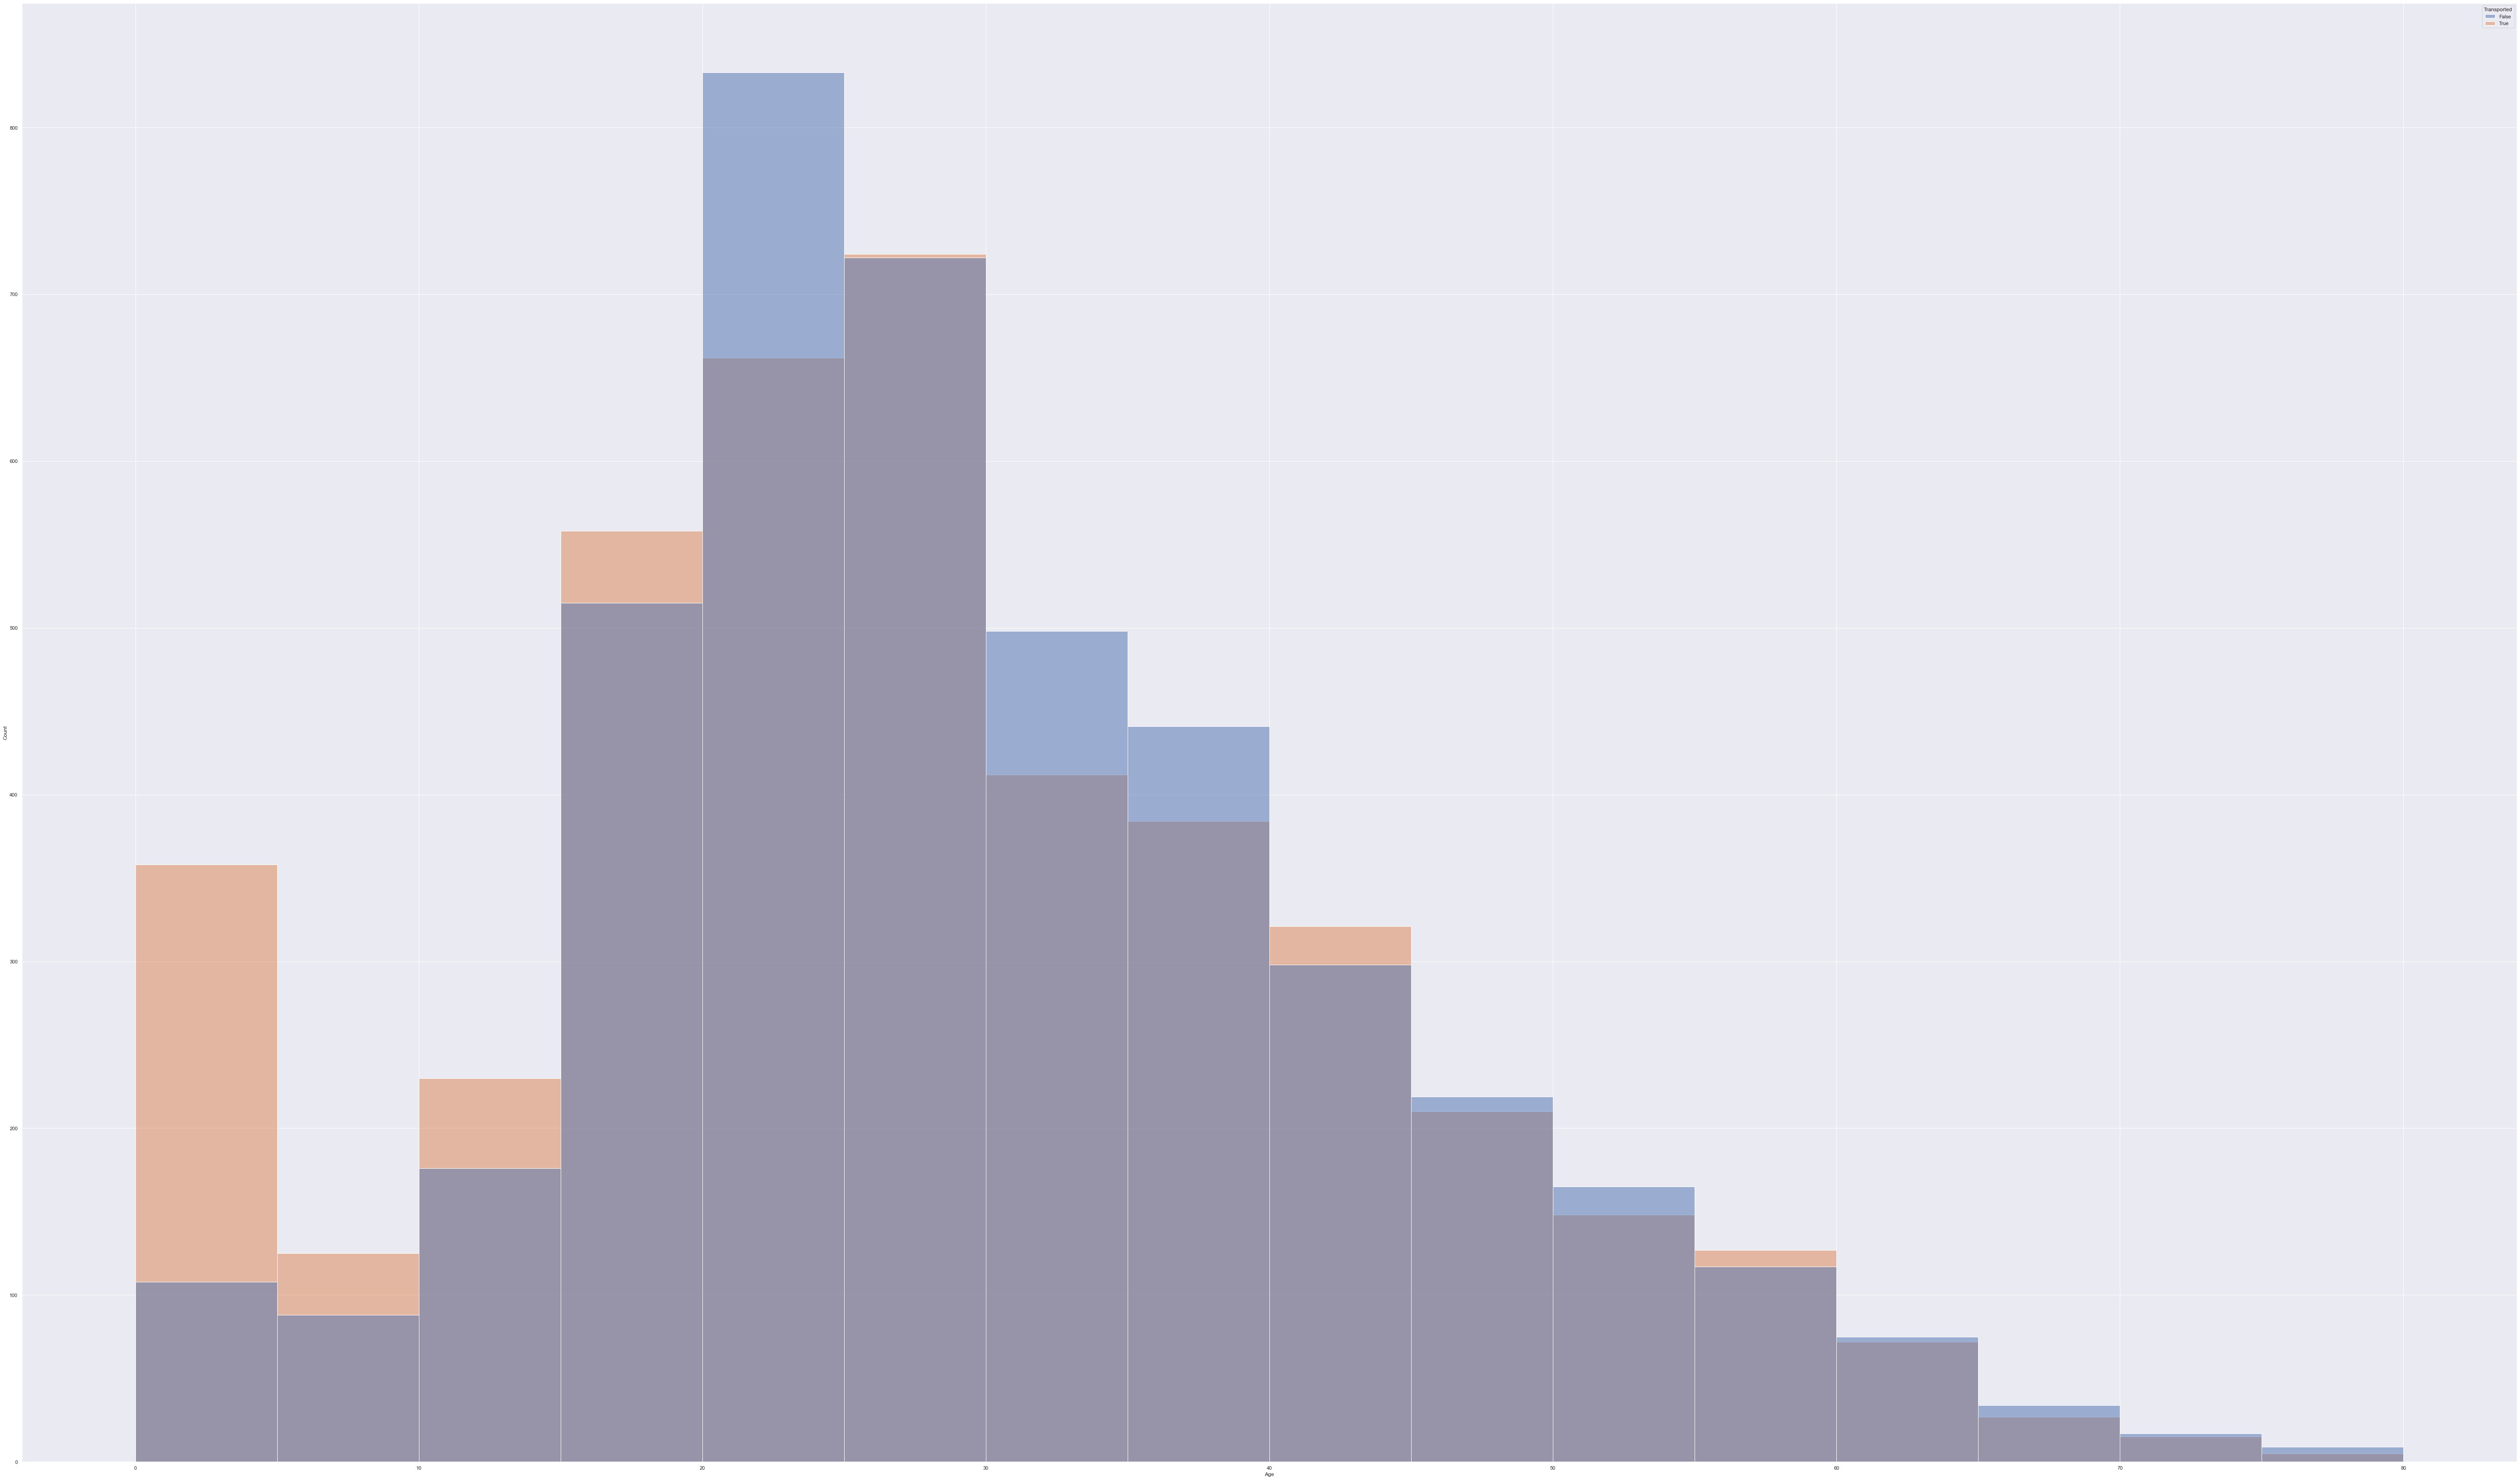

In [27]:
sns.histplot(data = df, x = "Age", hue = "Transported", stat = 'count', binwidth = 5, legend = True)
plt.show()

Main takeaway is that if you were you were between the ages of roughly 0-8 (especially on the younger side), you were more likely to be transported. If you were between the ages of 20-40, you were more likely to not be transported. 

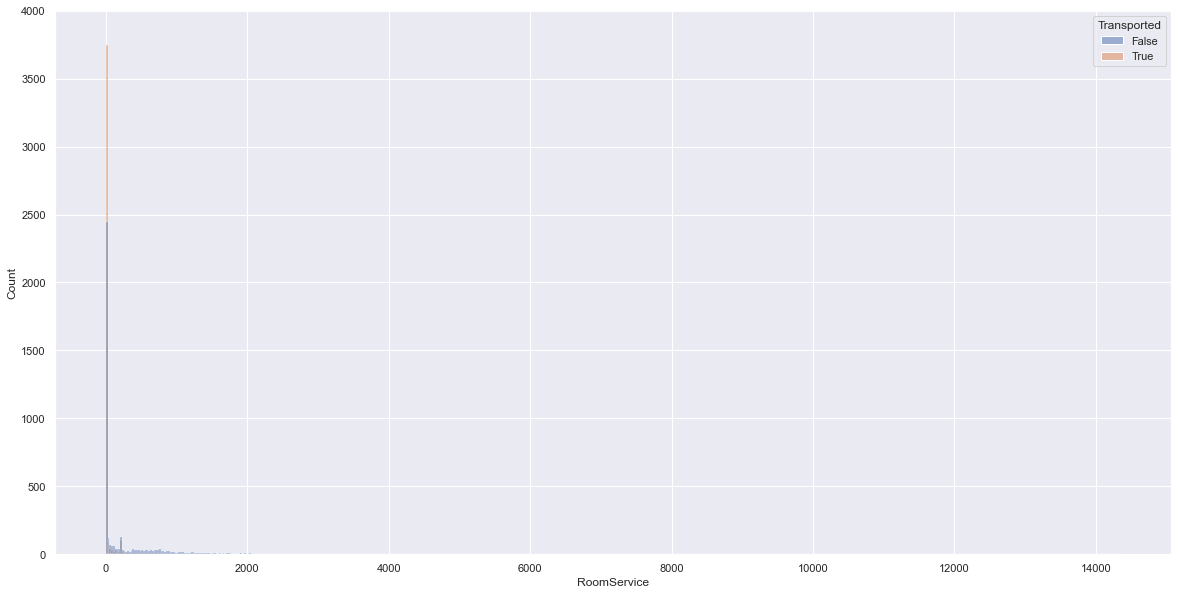

In [28]:
sns.set(rc={'figure.figsize':(20,10)})
plt.ylim(0,4000)
sns.histplot(data = df, x = "RoomService", hue = "Transported", stat = 'count', binwidth = 25, legend = True)
plt.show()

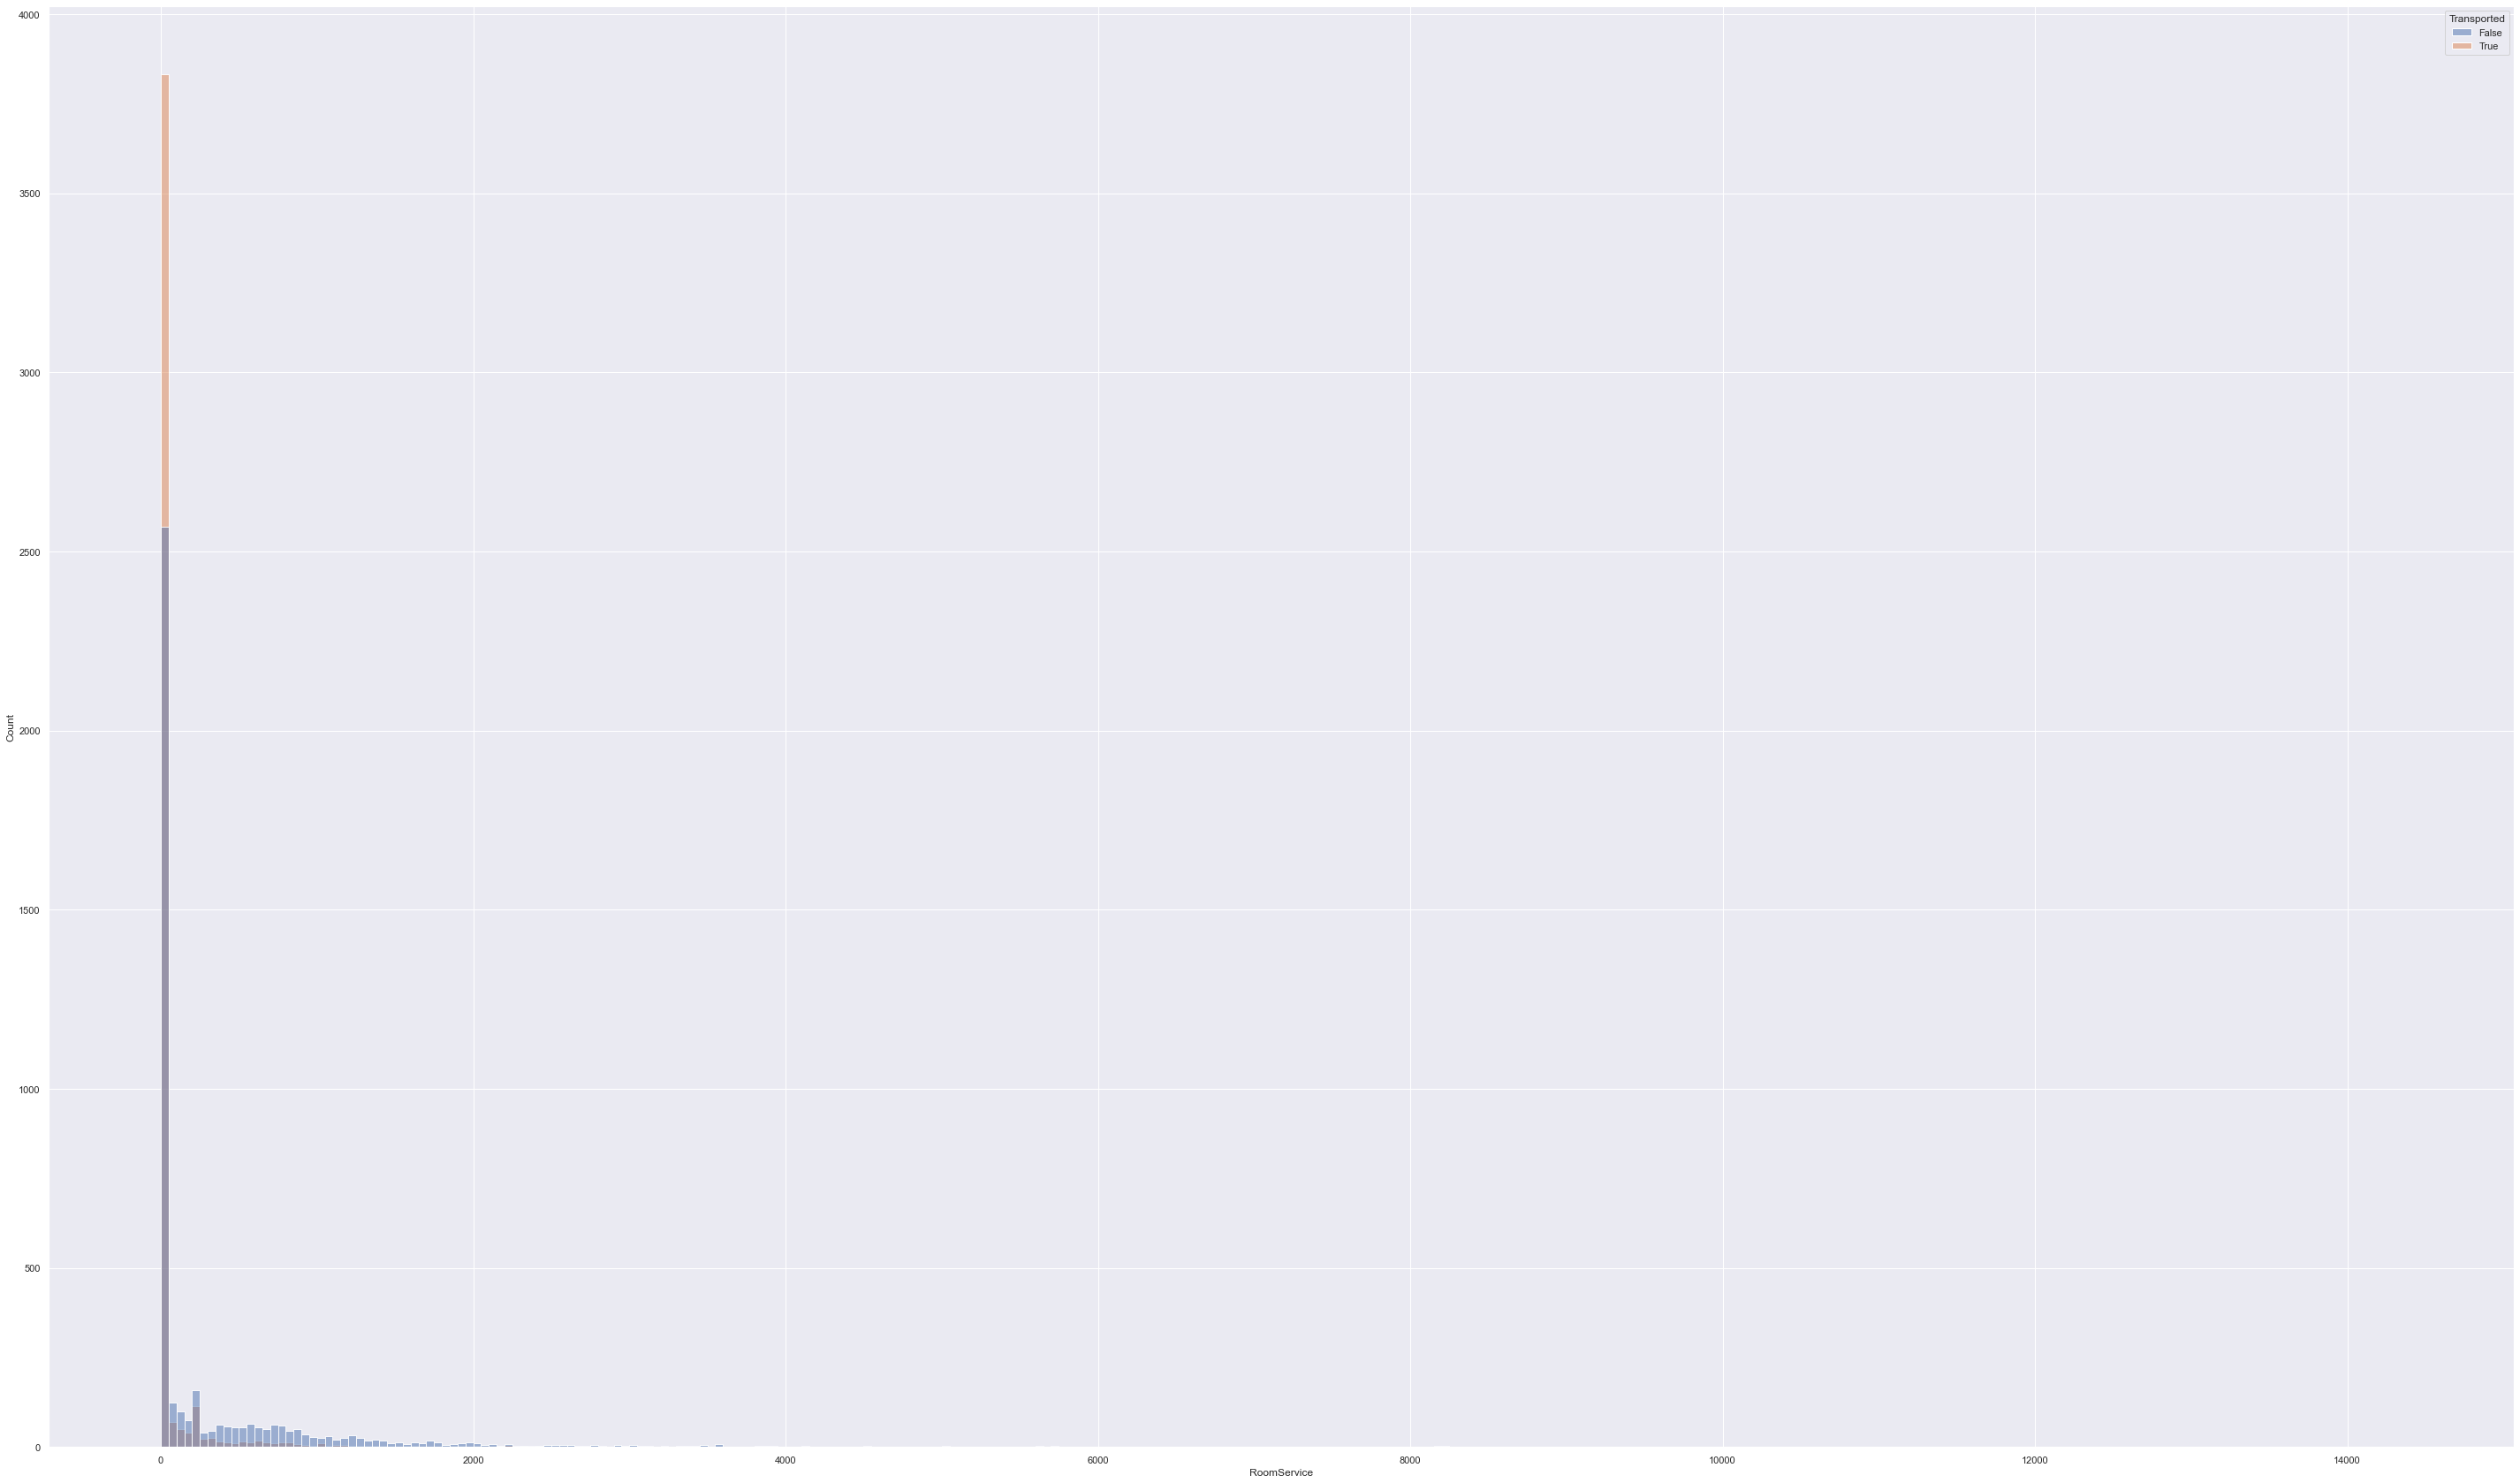

In [29]:
sns.set(rc={'figure.figsize':(50,30)})
sns.histplot(data = df, x = "RoomService", hue = "Transported", stat = 'count', binwidth = 50, legend = True)
plt.show()

In [30]:
no_RS = df[df['RoomService'] <=50]
no_RS['Transported'].value_counts()

True     3834
False    2572
Name: Transported, dtype: int64

In [31]:
alot_RS = df[df['RoomService'] >50]
alot_RS['Transported'].value_counts()

False    1743
True      544
Name: Transported, dtype: int64

Main takeaway is that if you spent less than $50, you were 60% likely to be transported. If you spent more, you were 76% likely not to be transported.

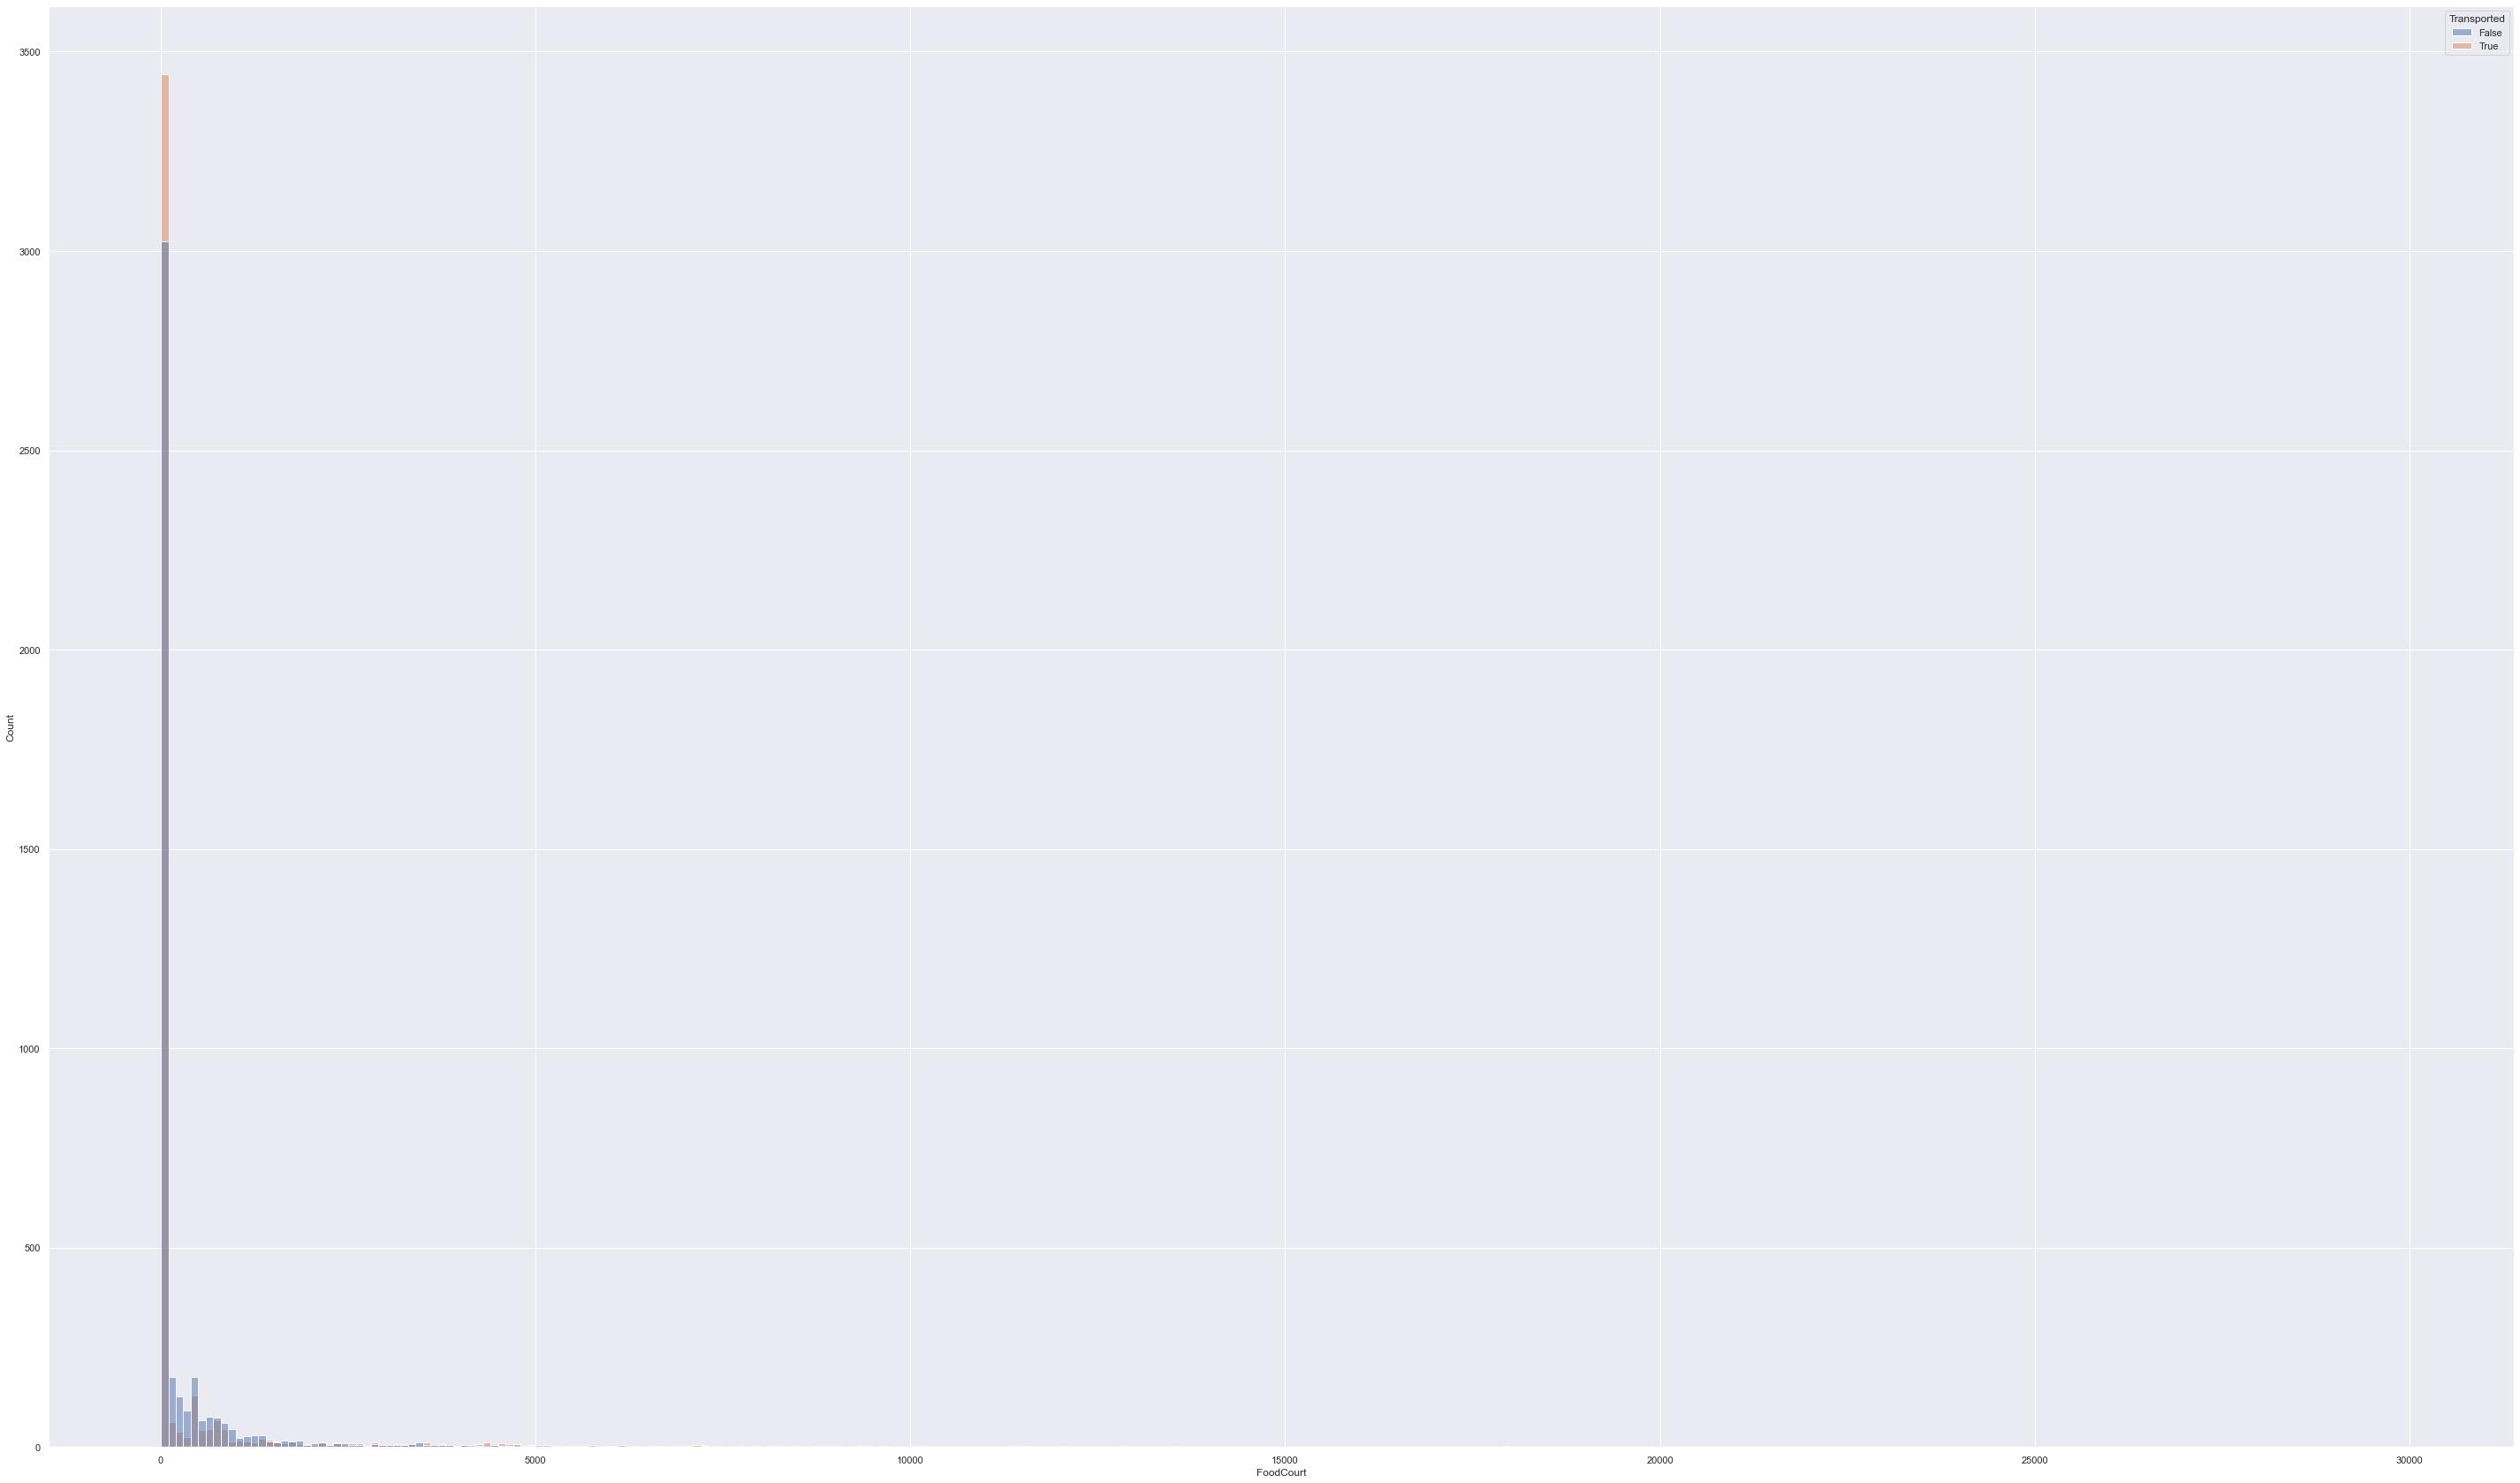

In [32]:
sns.histplot(data = df, x = "FoodCourt", hue = "Transported", stat = 'count', binwidth = 100, legend = True)
plt.show()

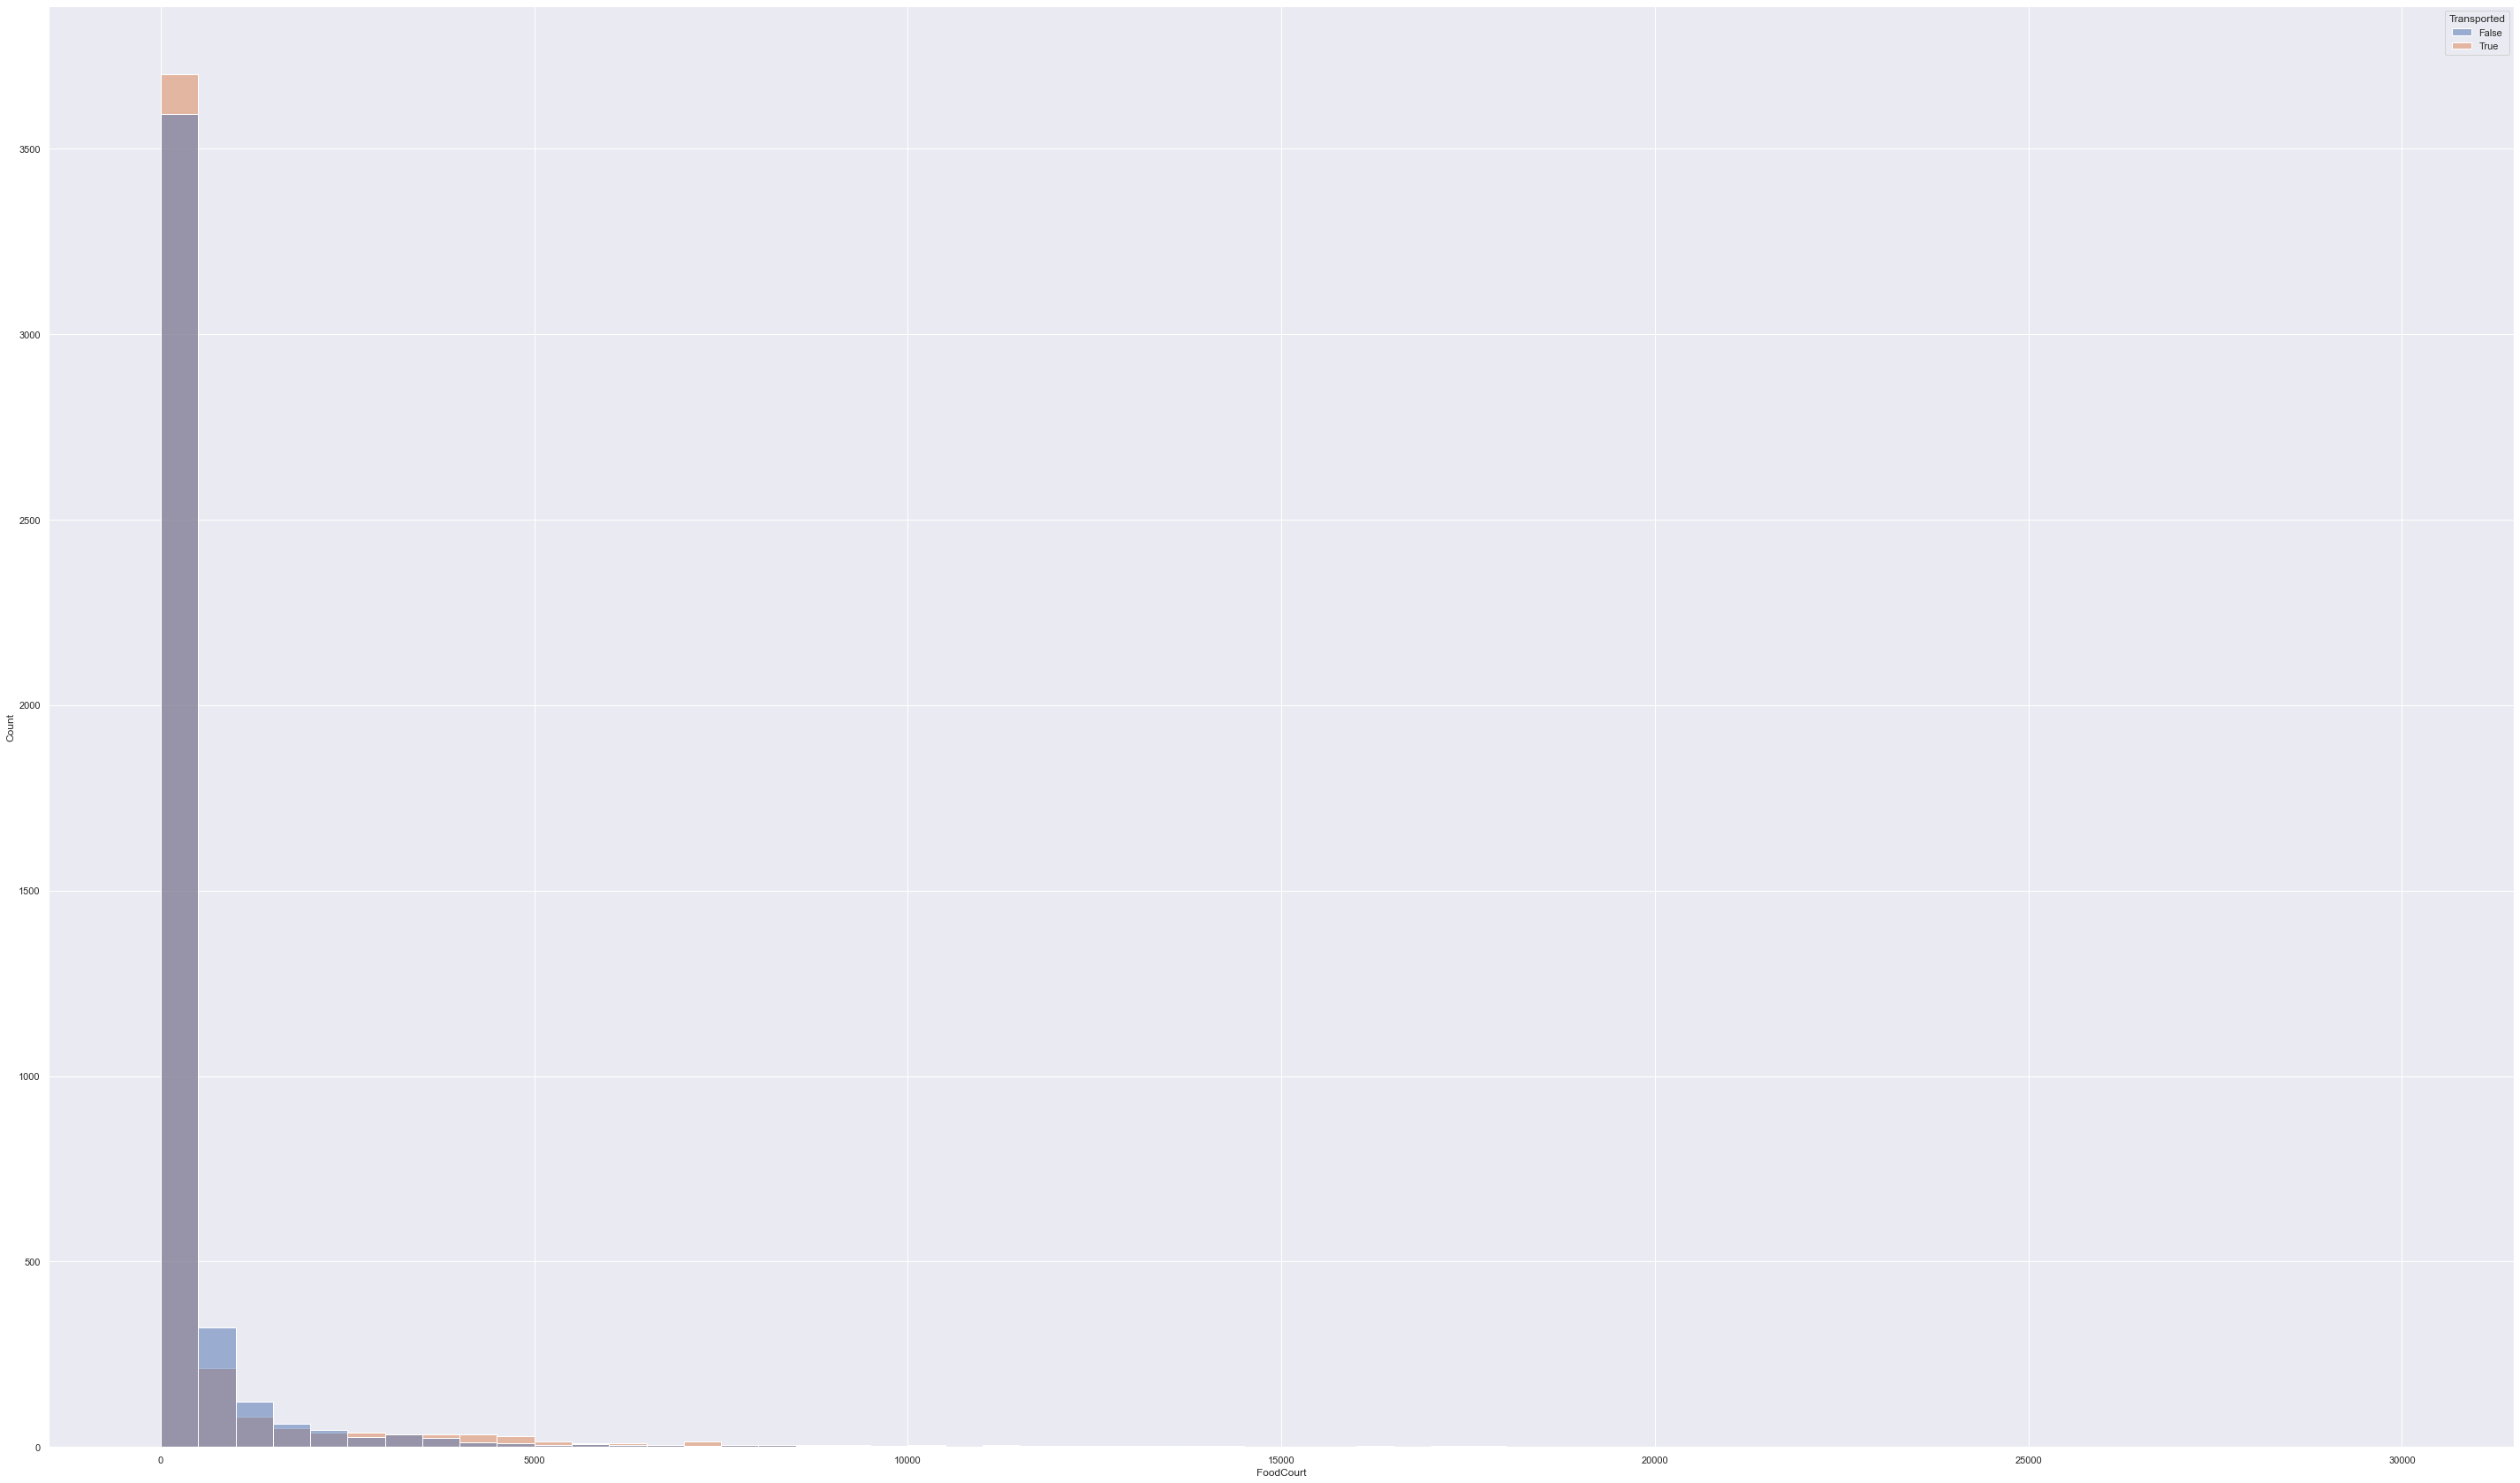

In [33]:
sns.histplot(data = df, x = "FoodCourt", hue = "Transported", stat = 'count', binwidth = 500, legend = True)
plt.show()

We dont see as much separation between those that were transported and not transported in food court spending as we did in room service spending. We maybe see a little separation below the $100 spent level that favors those who spent less.

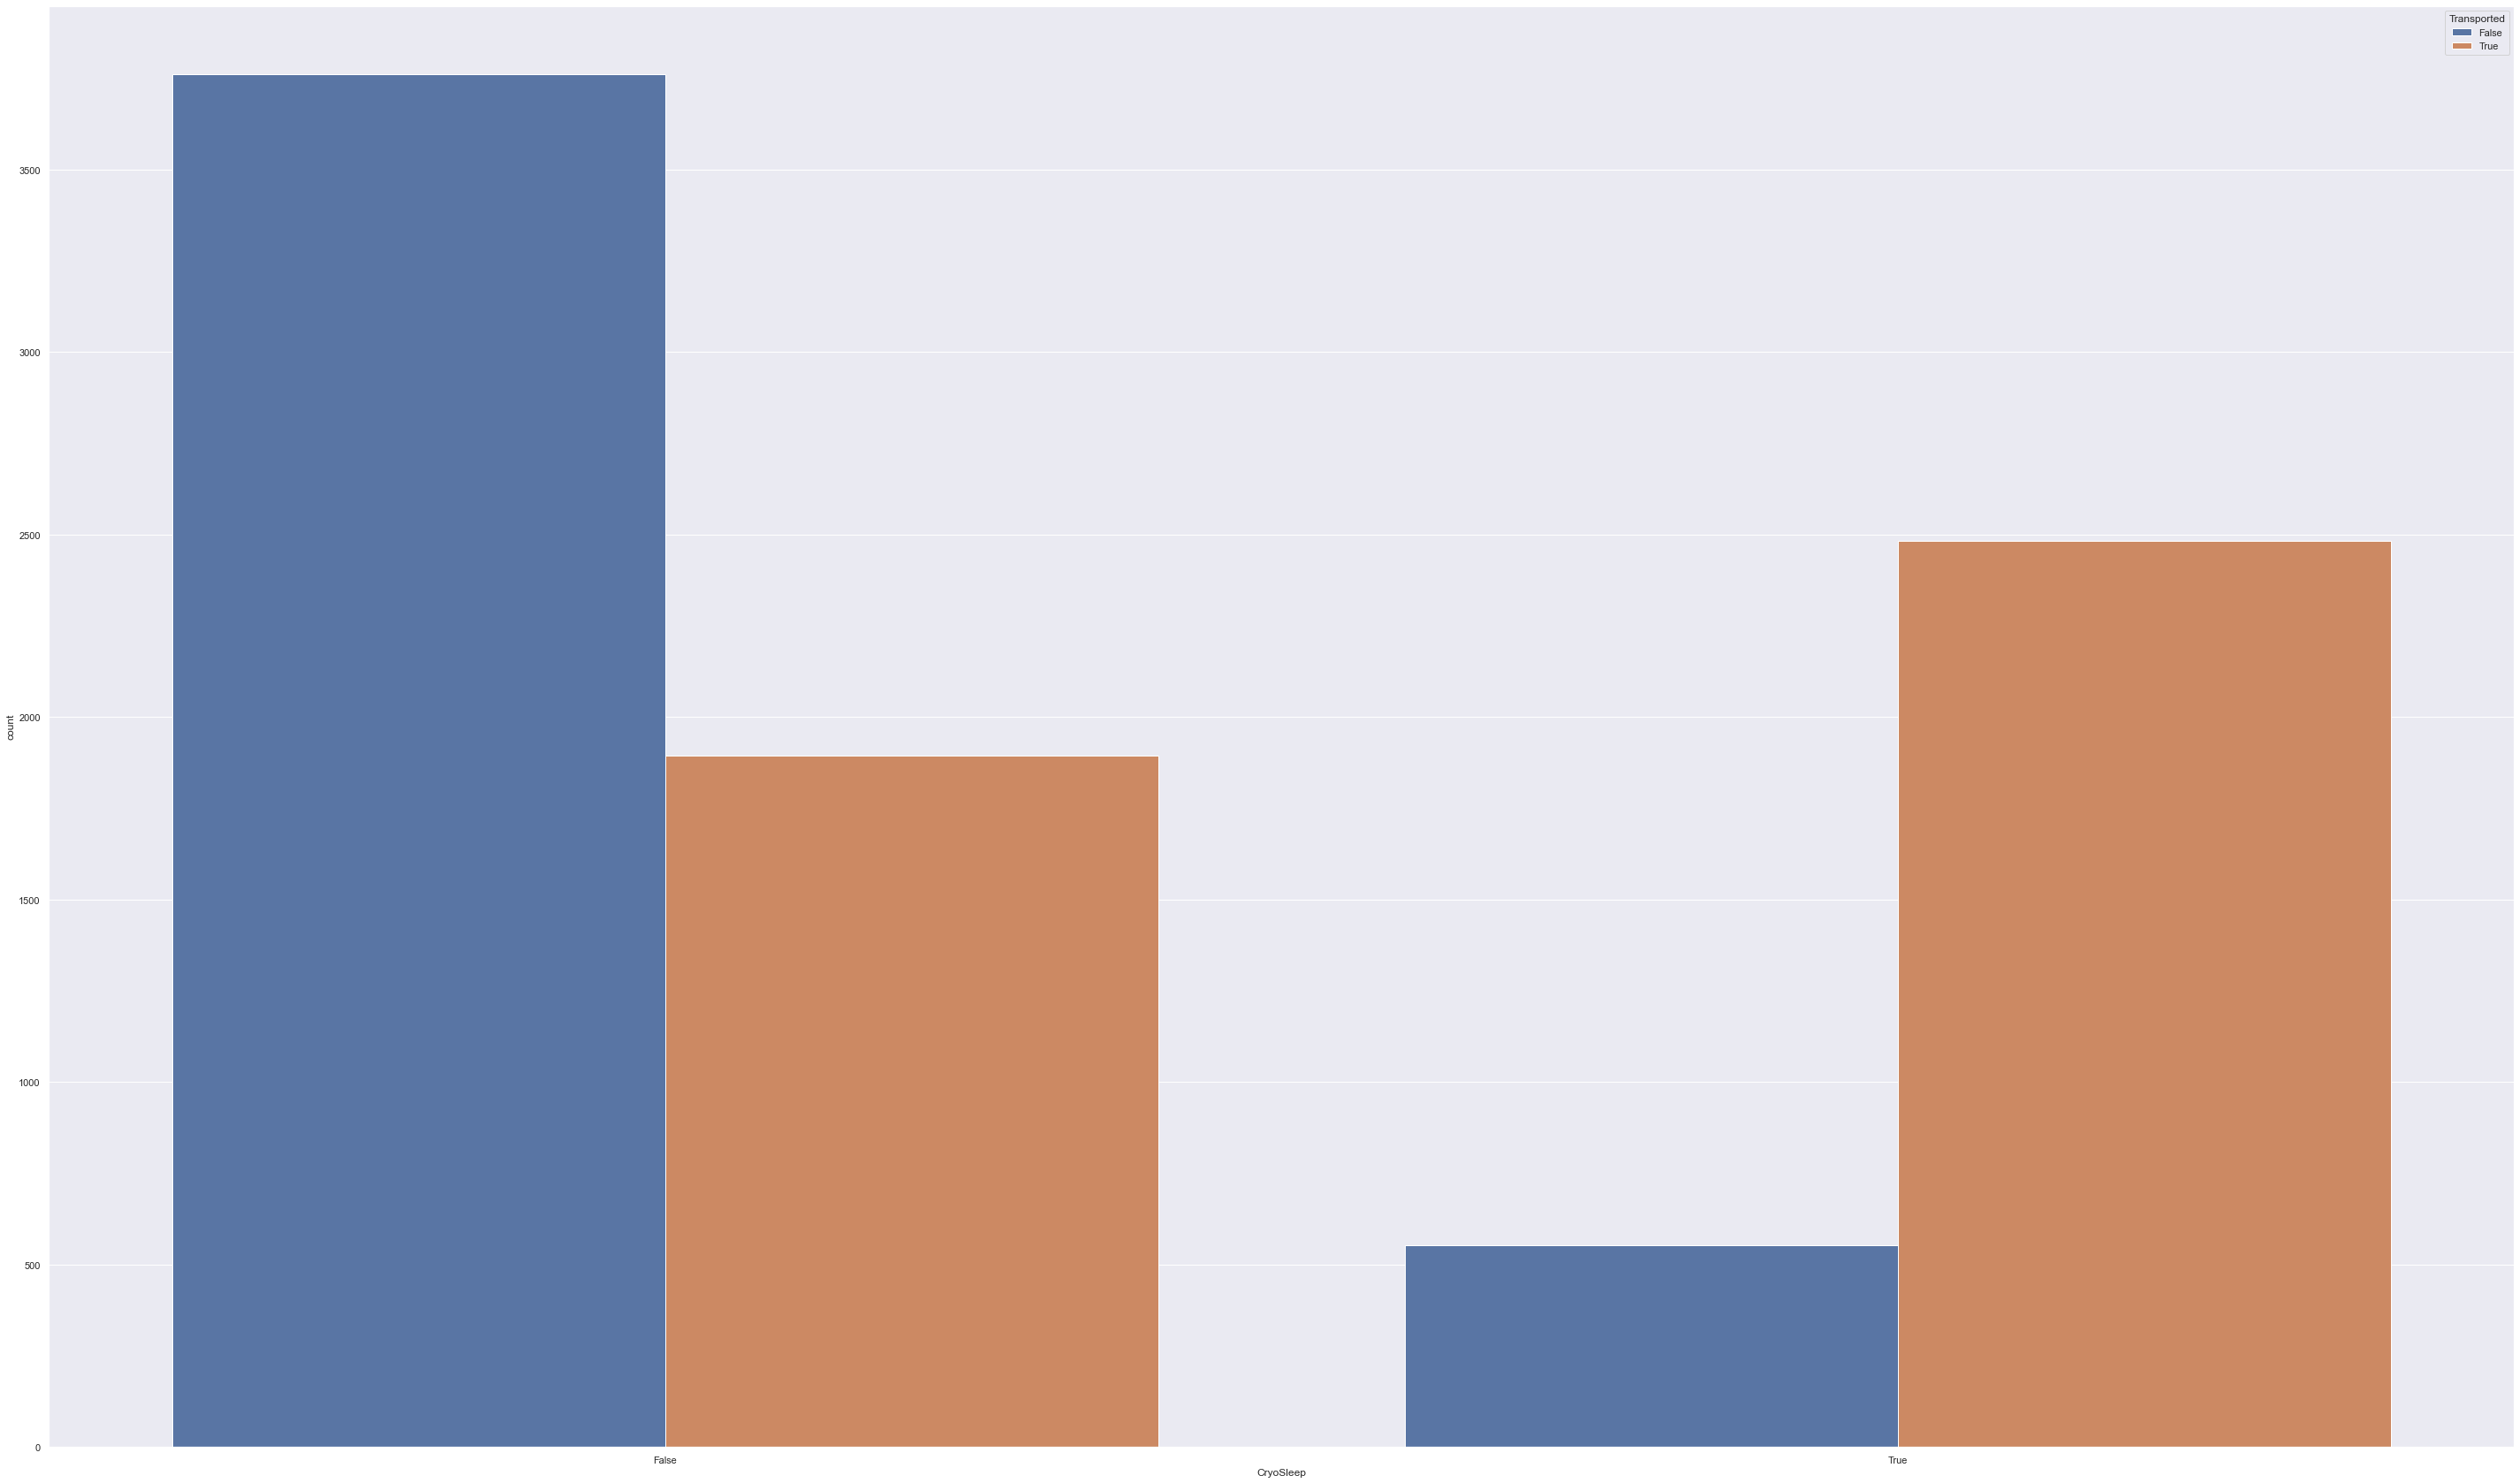

In [34]:
sns.countplot(data = df, x = "CryoSleep", hue = "Transported")
plt.show()

If you had cryo sleep you were almost 4x as likely to be transported, and if you didnt have cryosleep, you were almost 2x as likely to not be transported

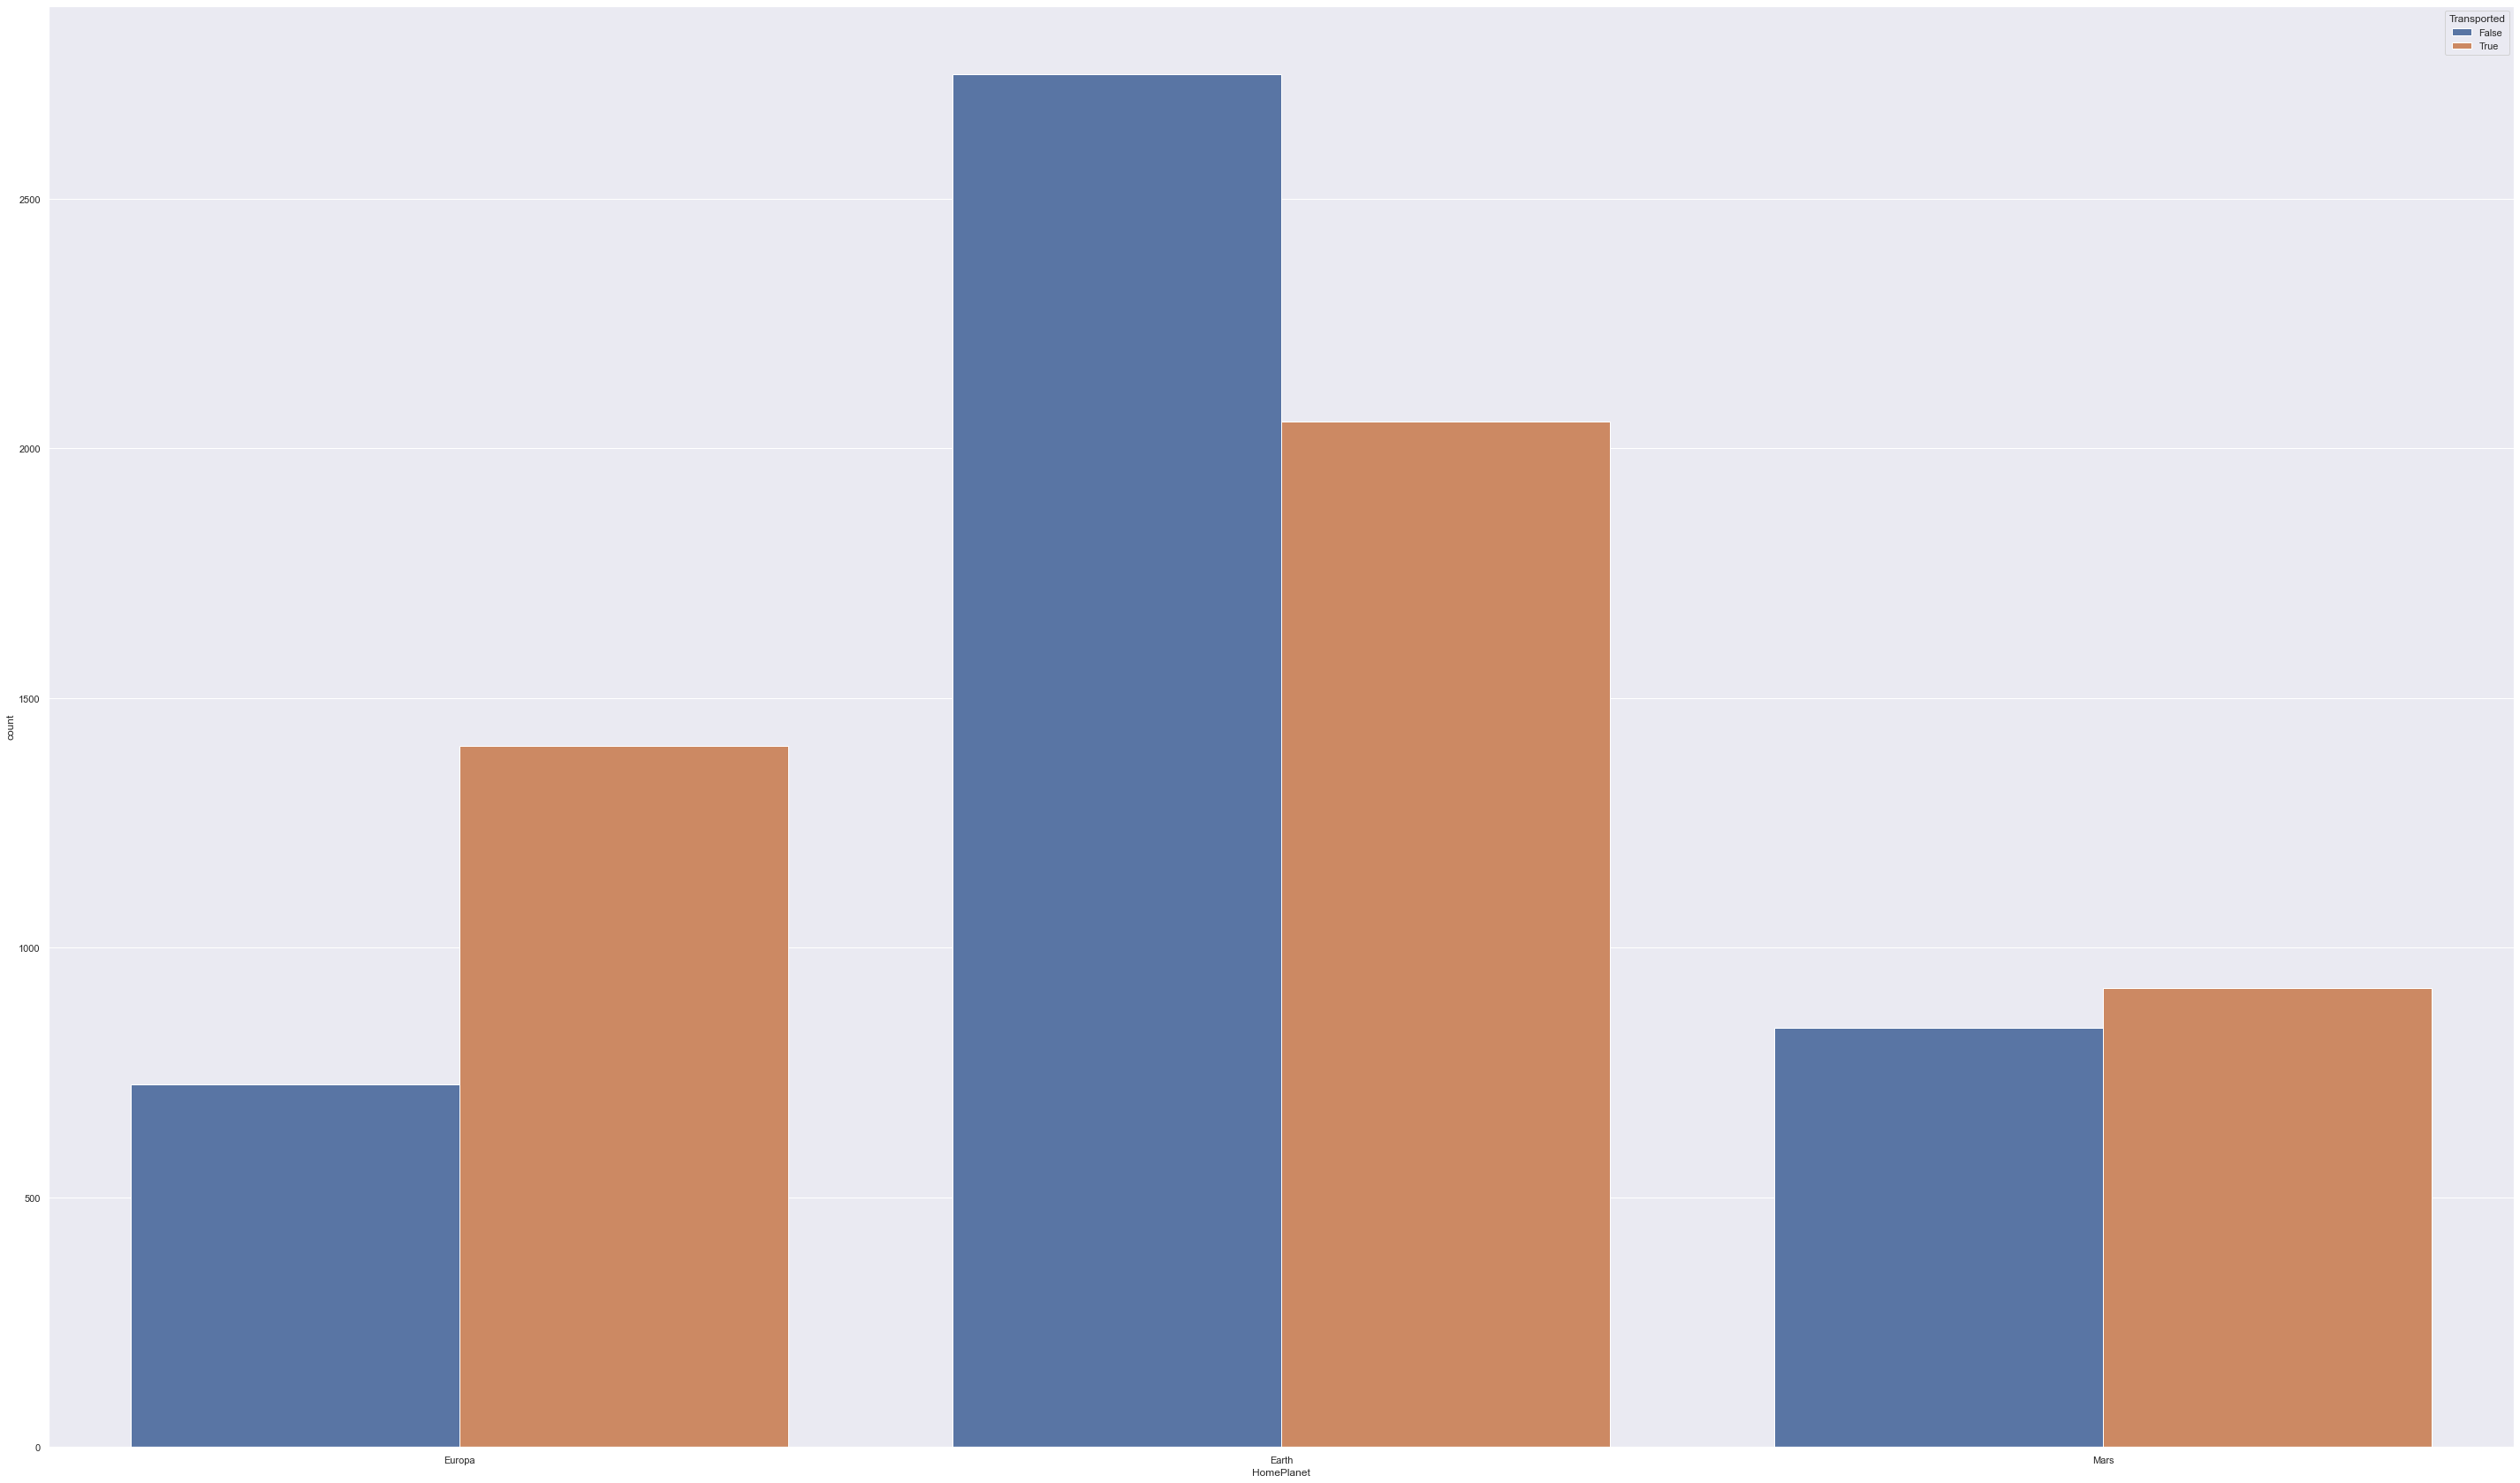

In [35]:
sns.countplot(data = df, x = "HomePlanet", hue = "Transported")
plt.show()

Being from Europa, you were almost 2x as likely to be transported than not transported. Roughly 60% of passengers from earth were not transported. Passengers from Mars being transpored was pretty much 50-50.

Also approximately half of the passengers were from earth

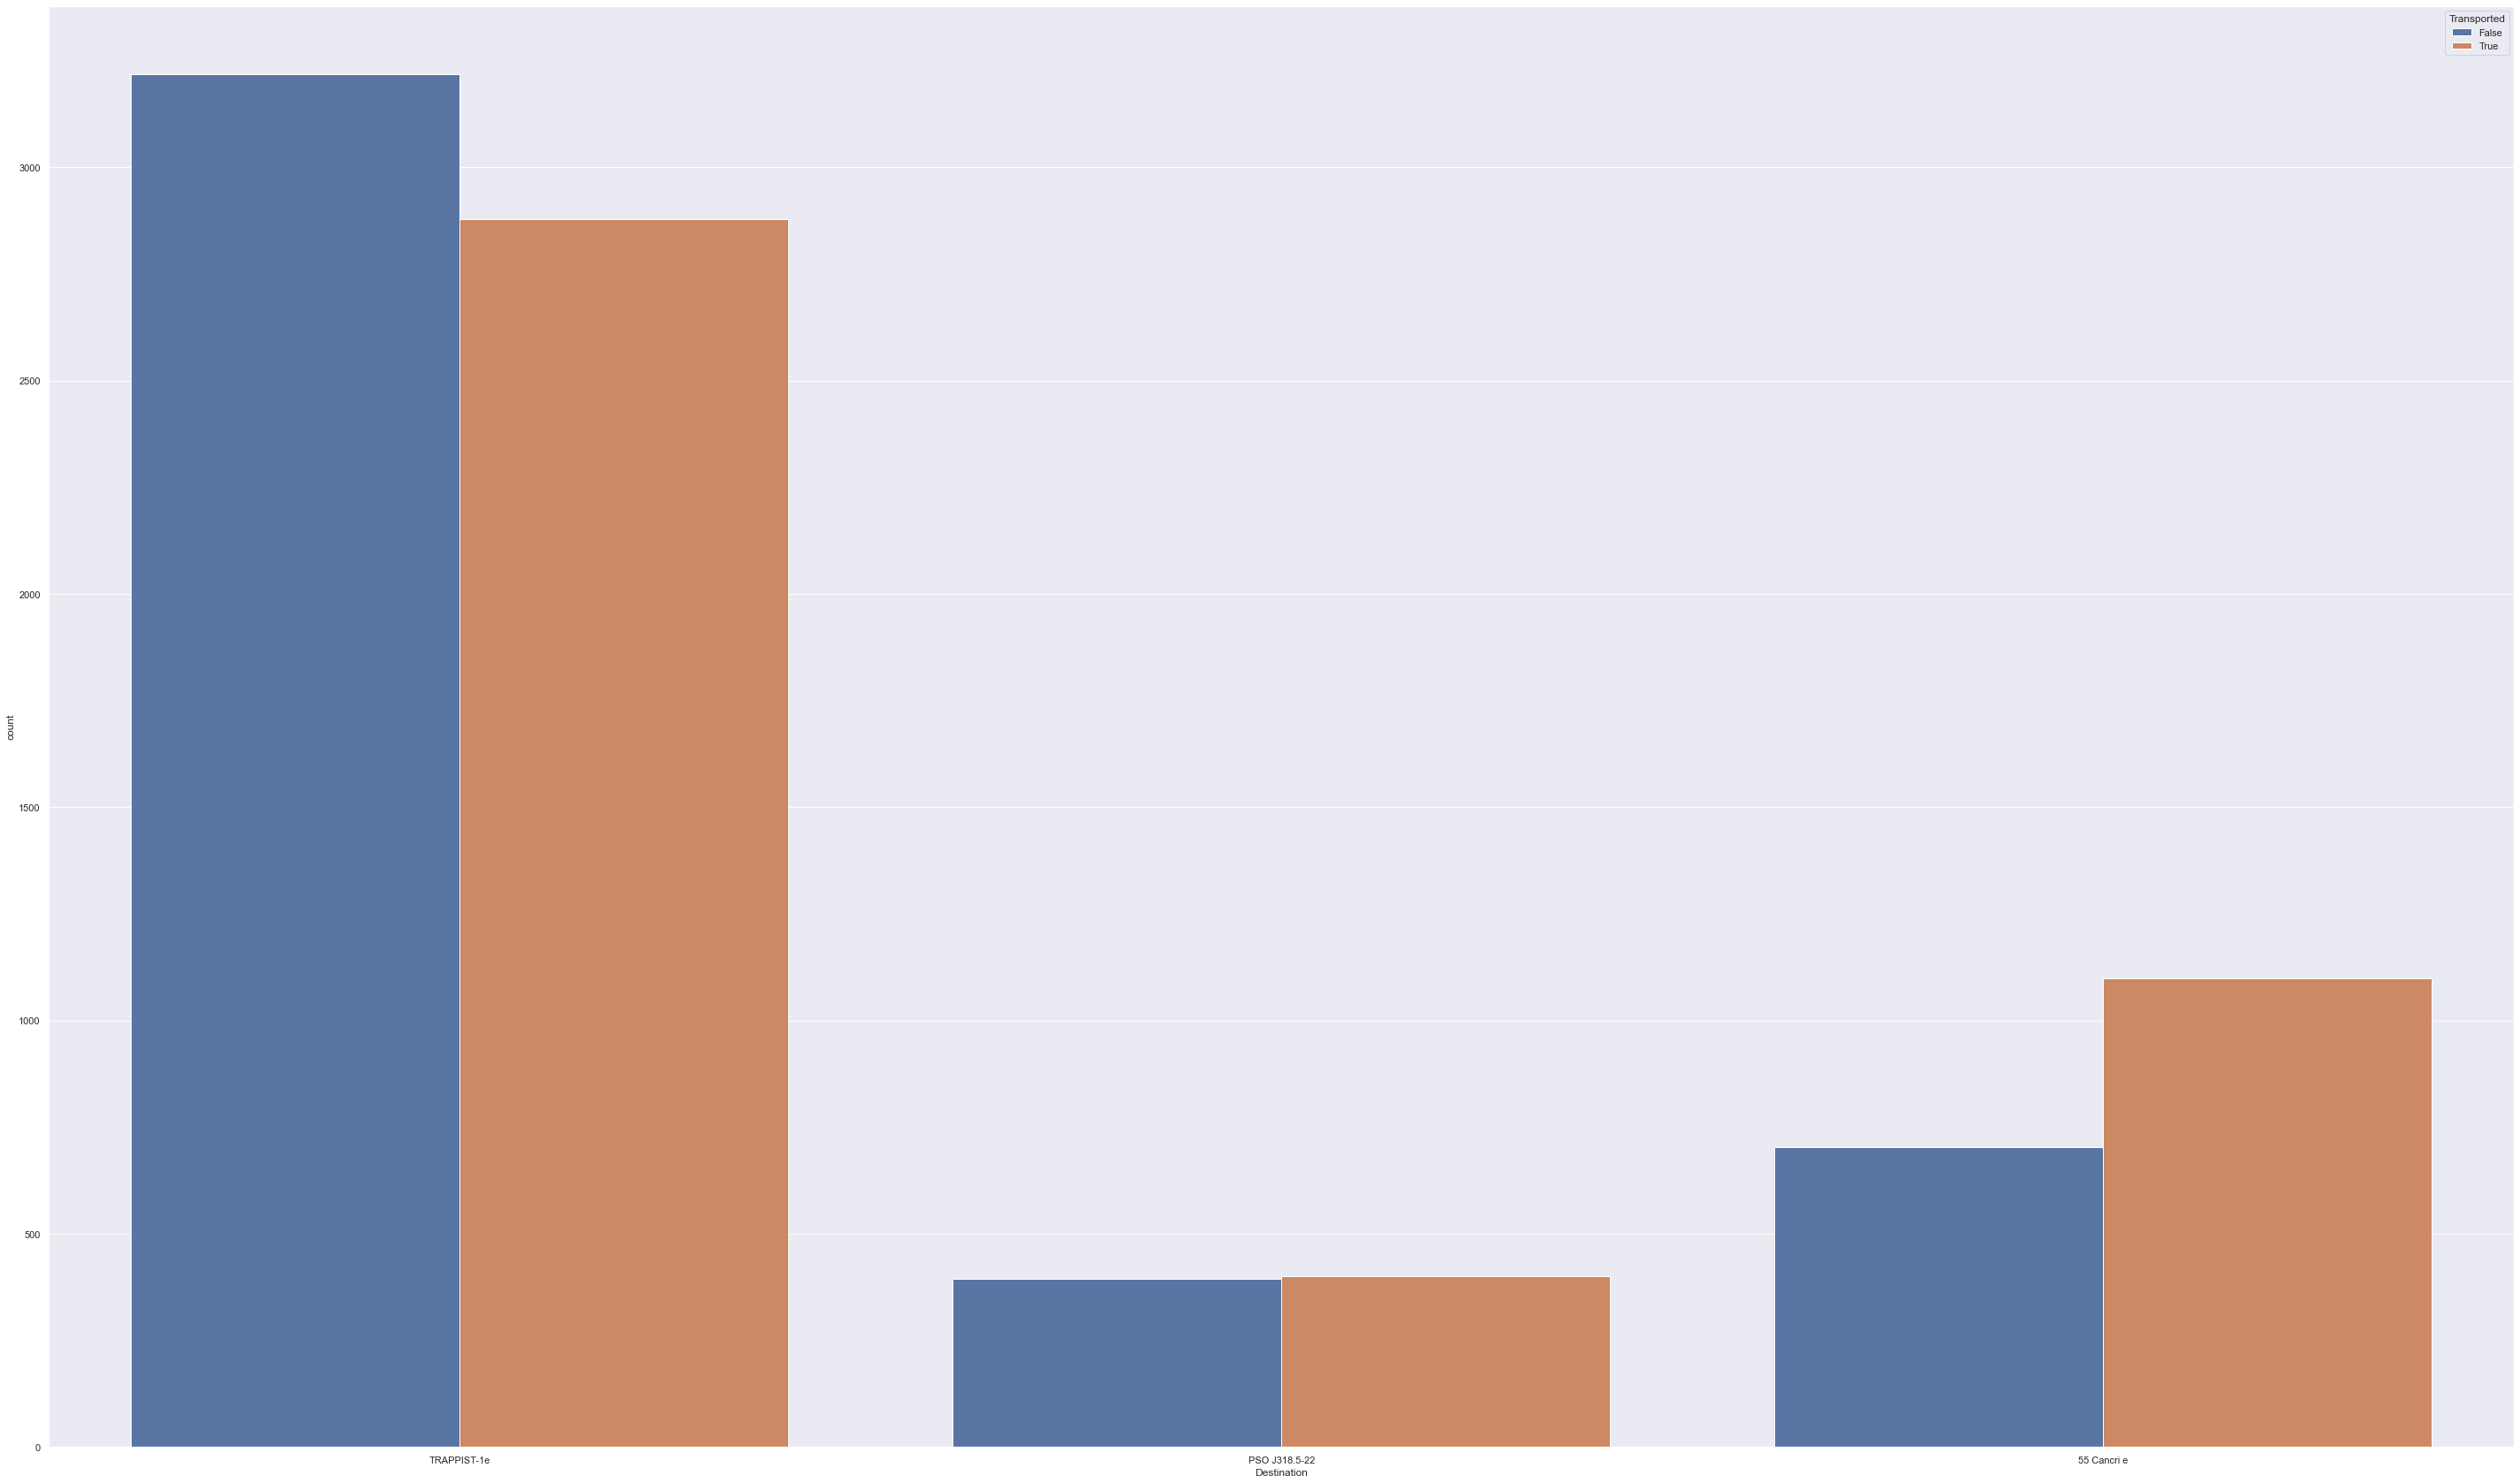

In [36]:
sns.countplot(data = df, x = "Destination", hue = "Transported")
plt.show()

There was no huge differences in transport rate based on destination. The largest difference was that approximately 60% of those traveling to 55 Cancri e were transported. 

A large majority of people were traveling to Trappist-1e

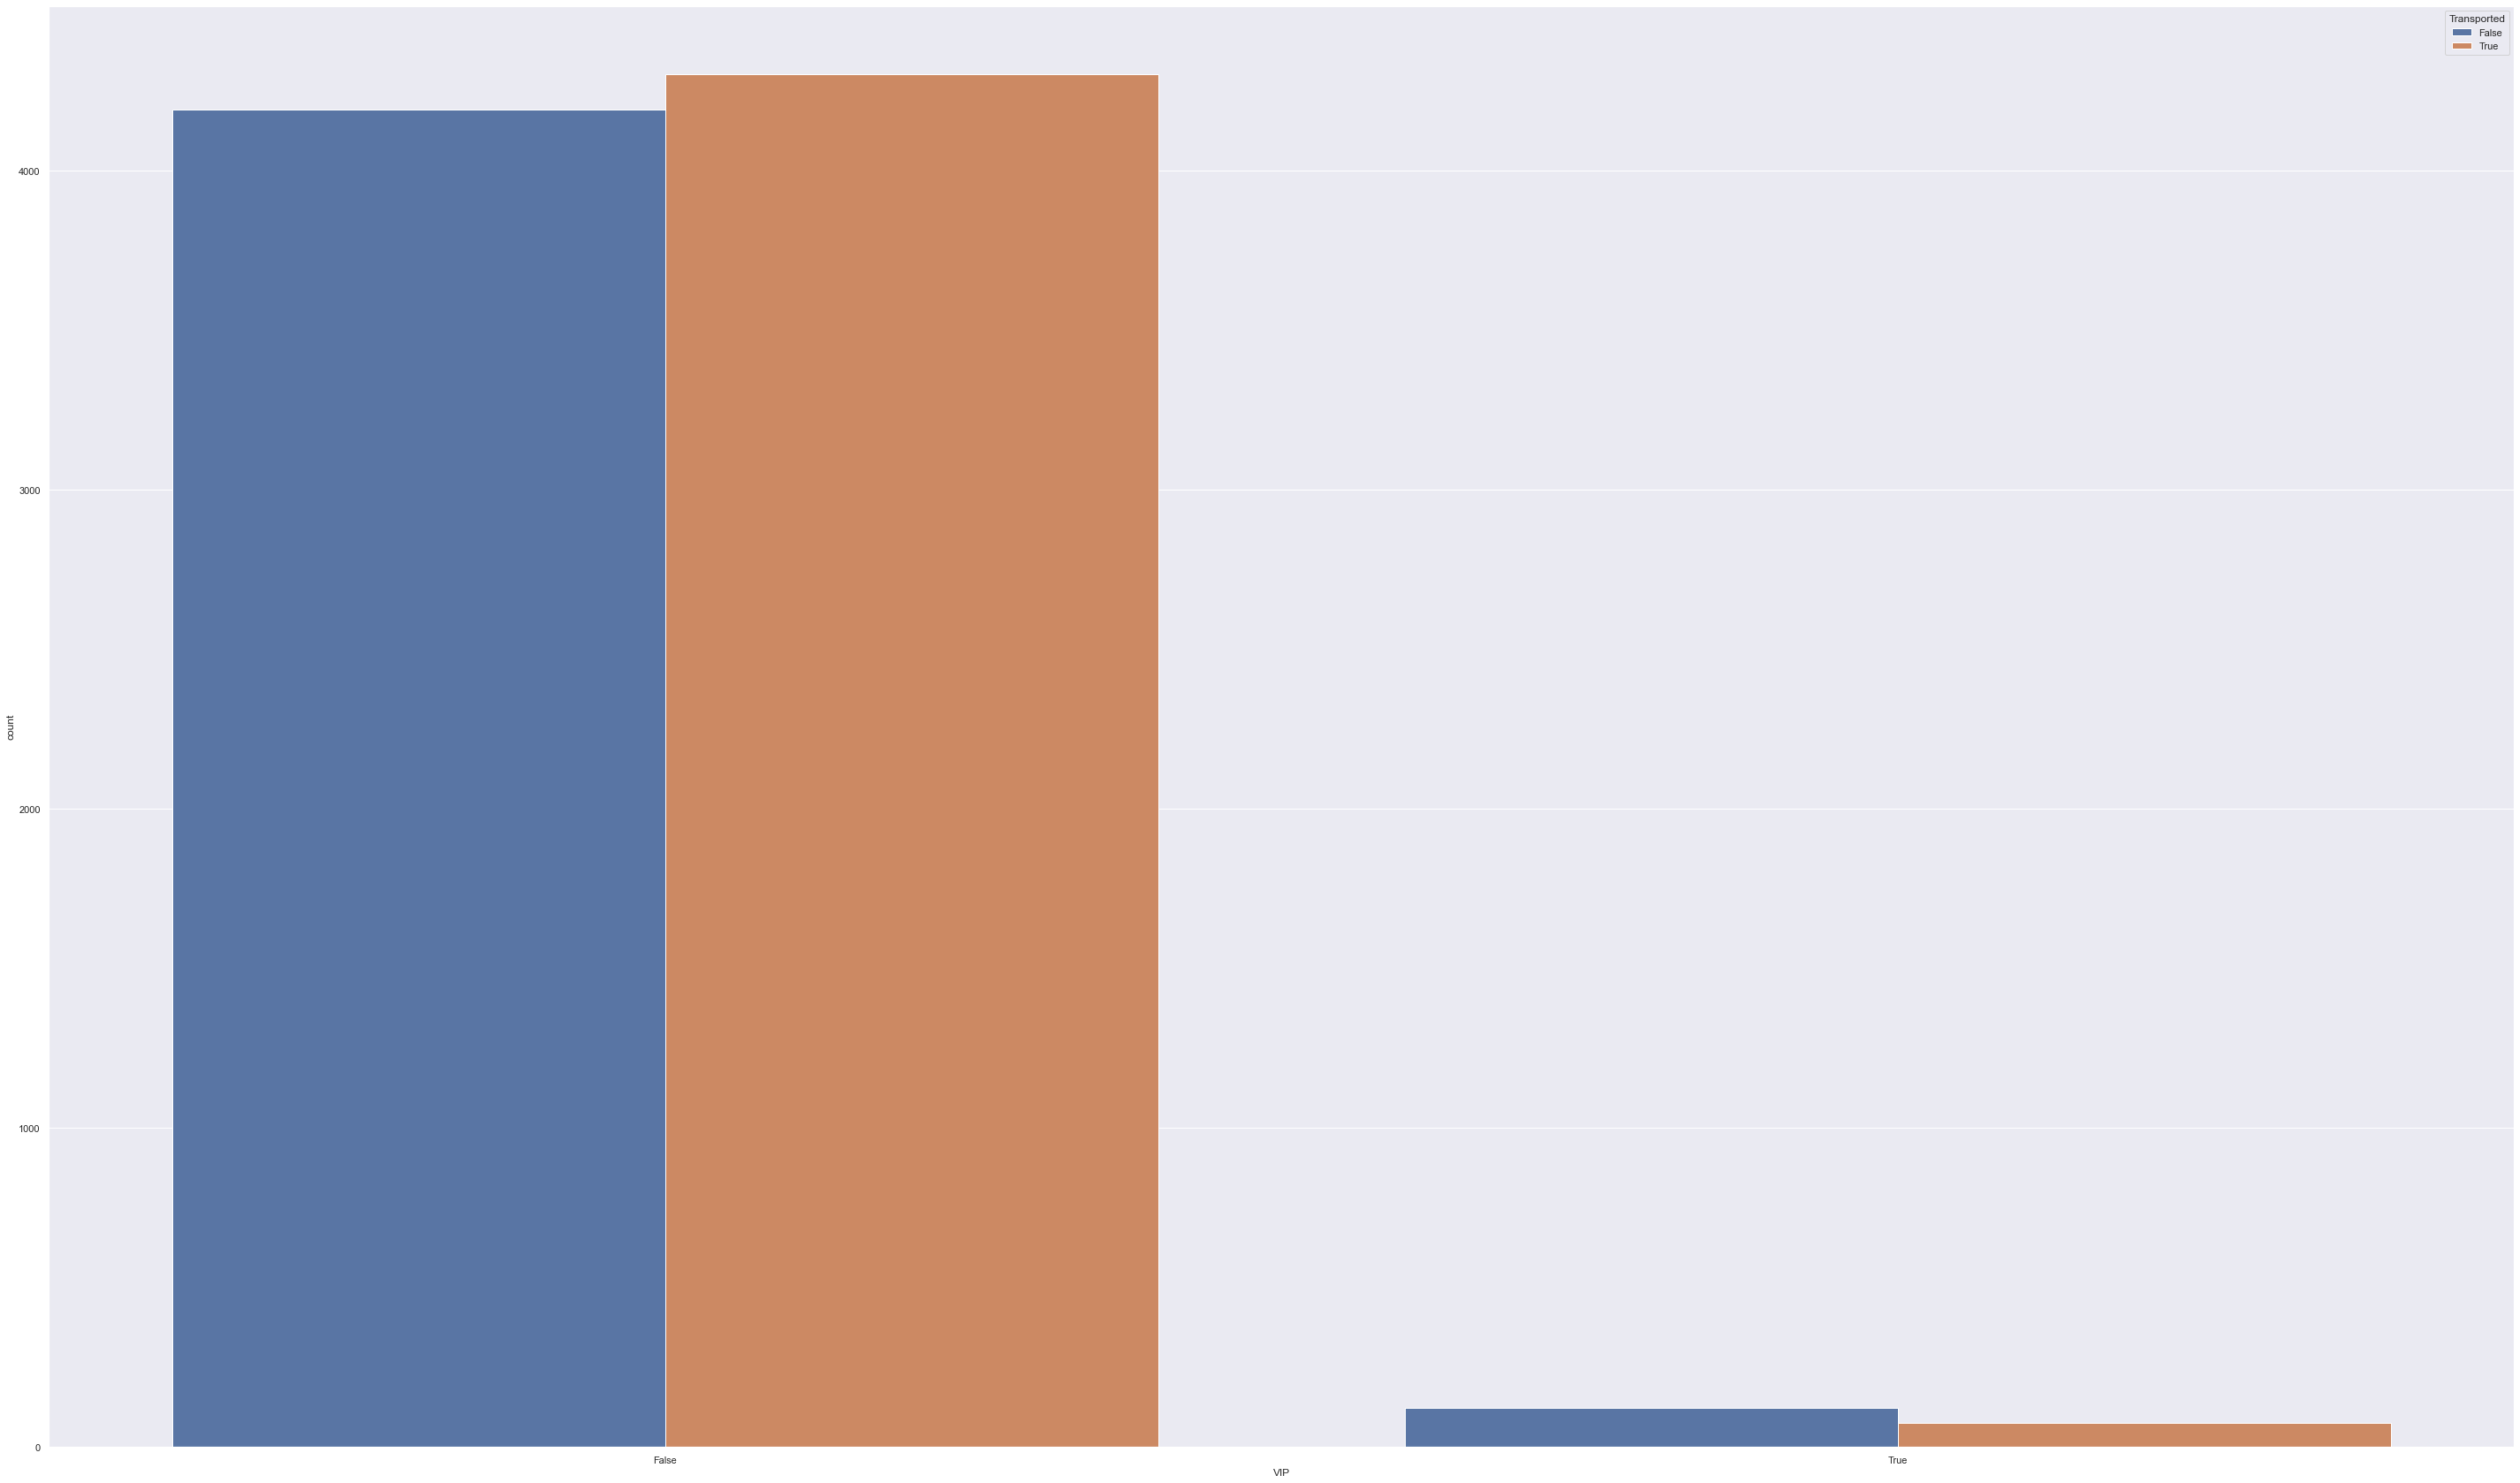

In [37]:
sns.countplot(data = df, x = "VIP", hue = "Transported")
plt.show()

In [38]:
VIP = df[df['VIP'] == True]
VIP['Transported'].value_counts()

False    123
True      76
Name: Transported, dtype: int64

62% of VIP passengers were not transported. 

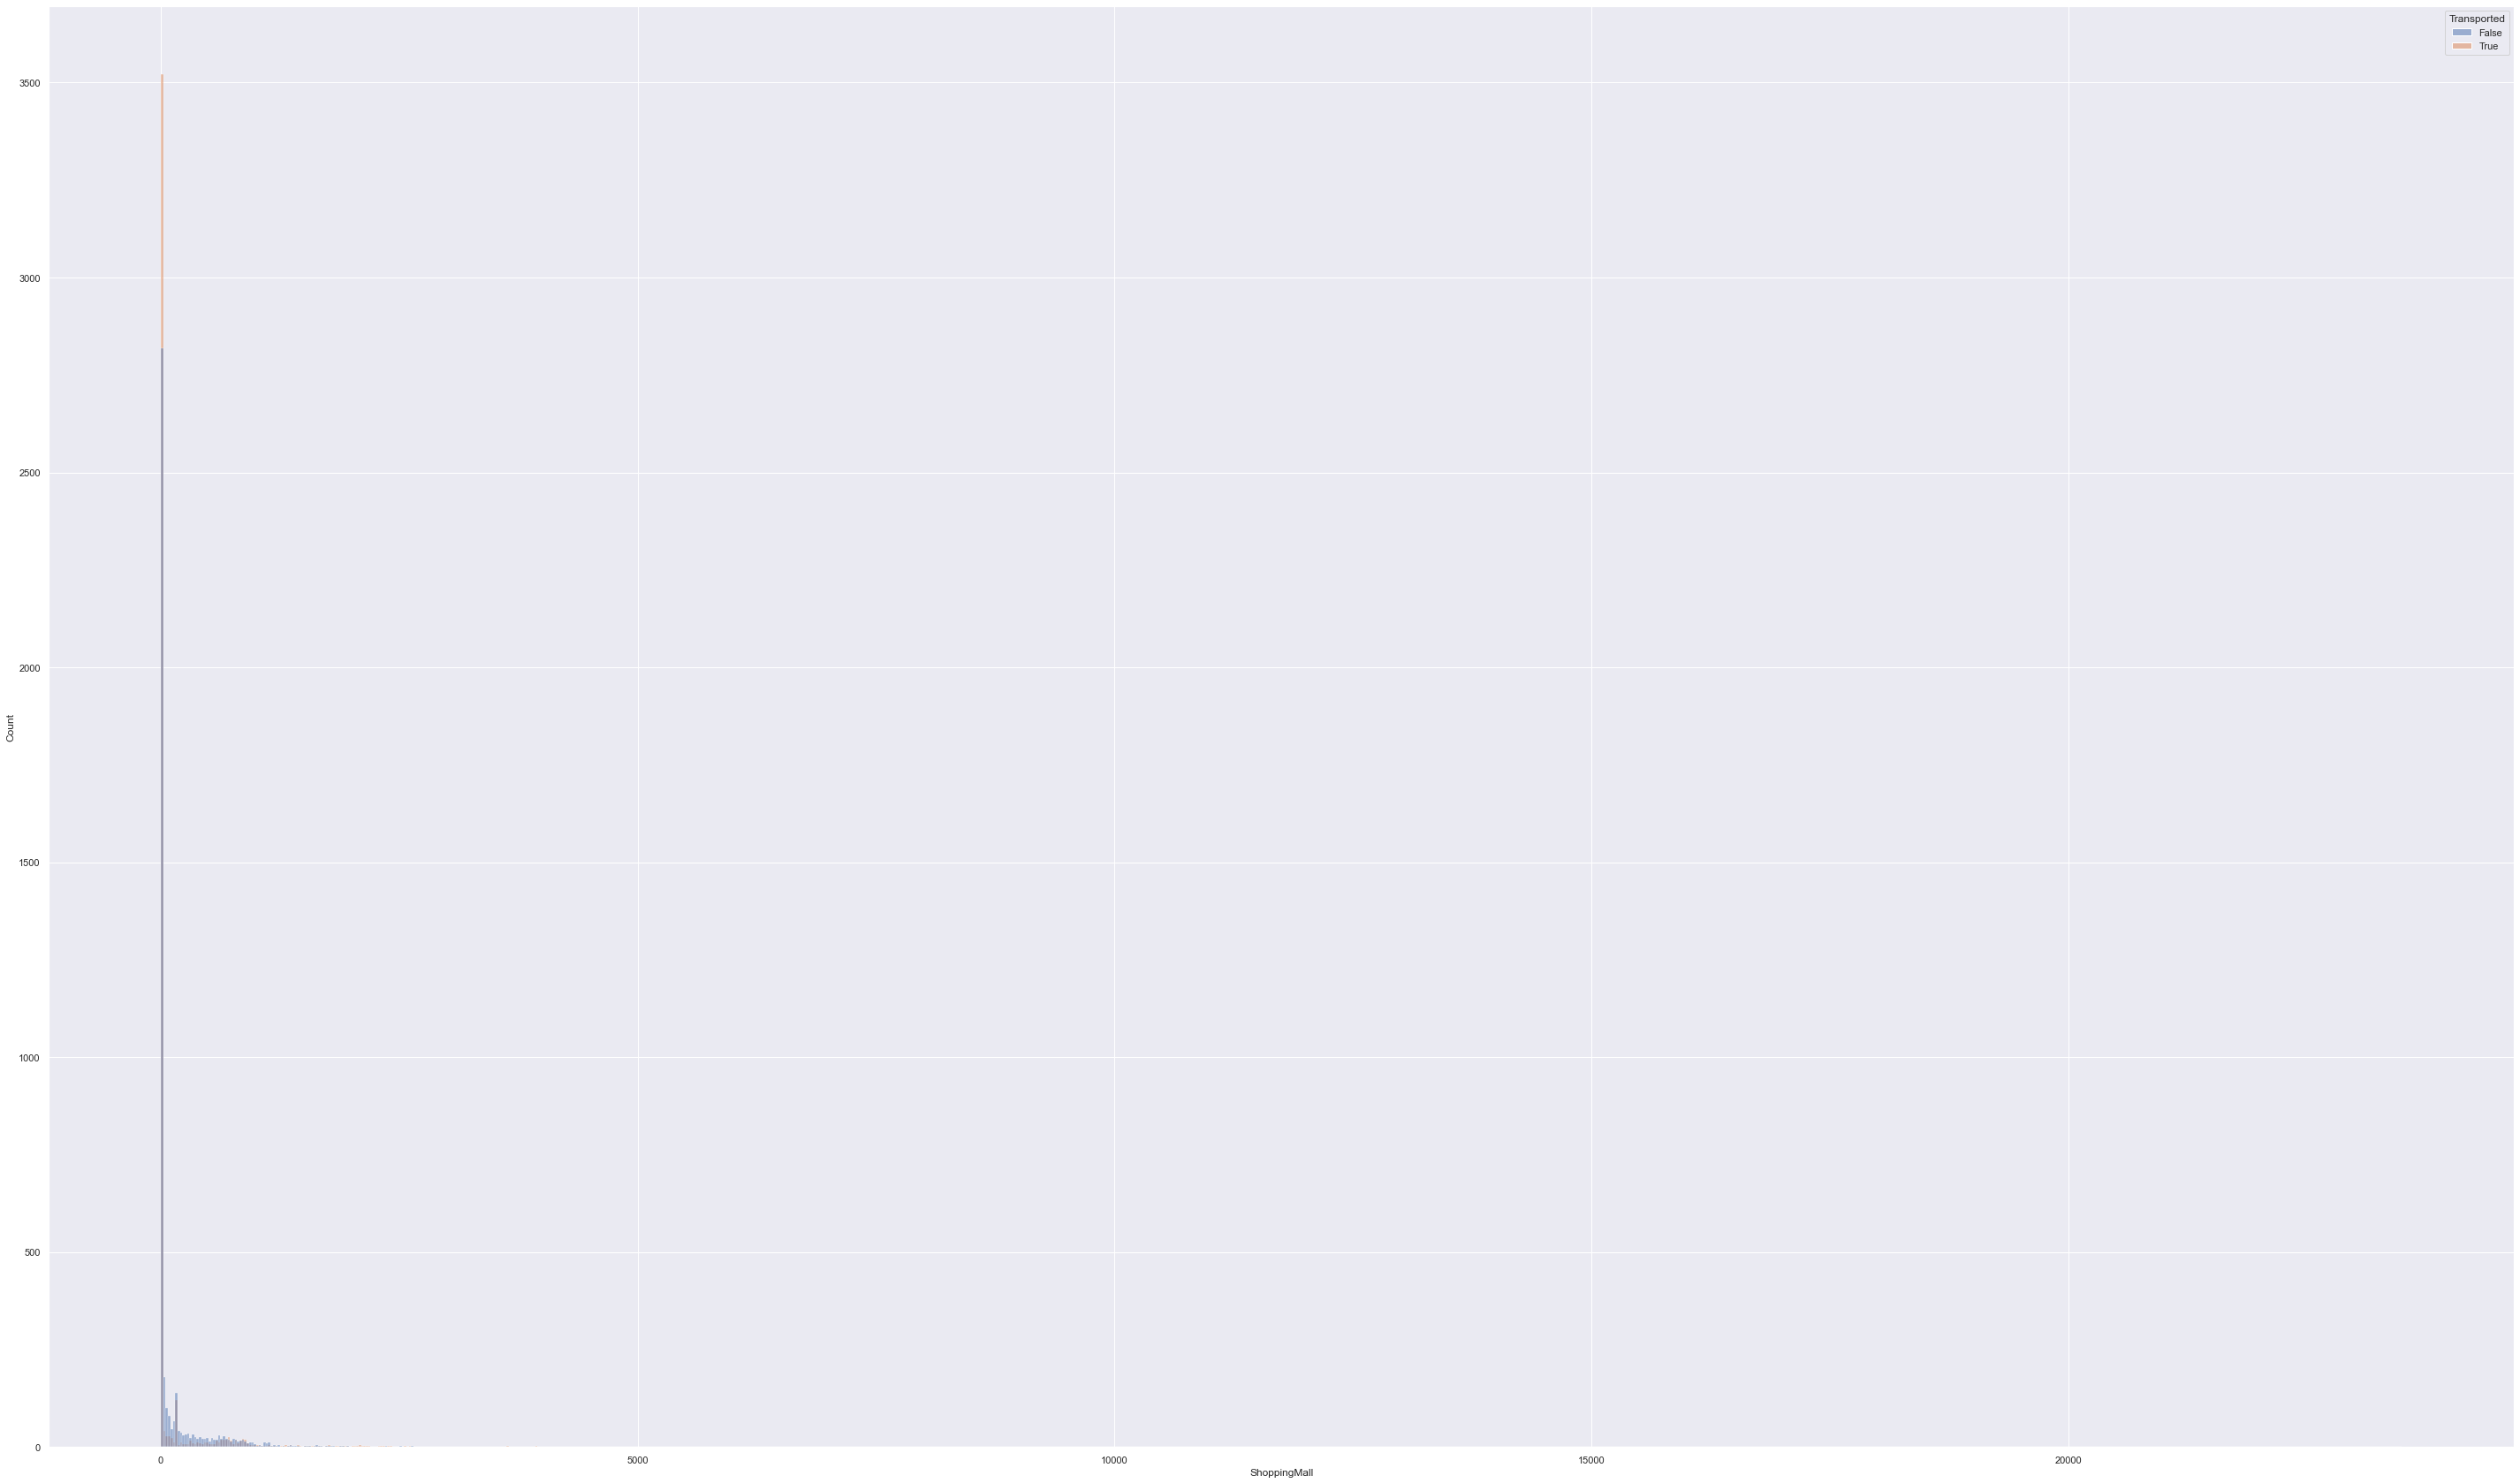

In [39]:
sns.set(rc={'figure.figsize':(50,30)})
sns.histplot(data = df, x = "ShoppingMall", hue = "Transported", stat = 'count', binwidth = 25, legend = True)
plt.show()

In [40]:
no_shopping = df[df['ShoppingMall'] <=25]
no_shopping['Transported'].value_counts()

True     3524
False    2826
Name: Transported, dtype: int64

In [41]:
no_shopping = df[df['ShoppingMall'] >25]
no_shopping['Transported'].value_counts()

False    1489
True      854
Name: Transported, dtype: int64

55% of all people who spent less than $25 in the shopping mall were transported. If you spent more than that, the likelyhood of not being transported was 64%.

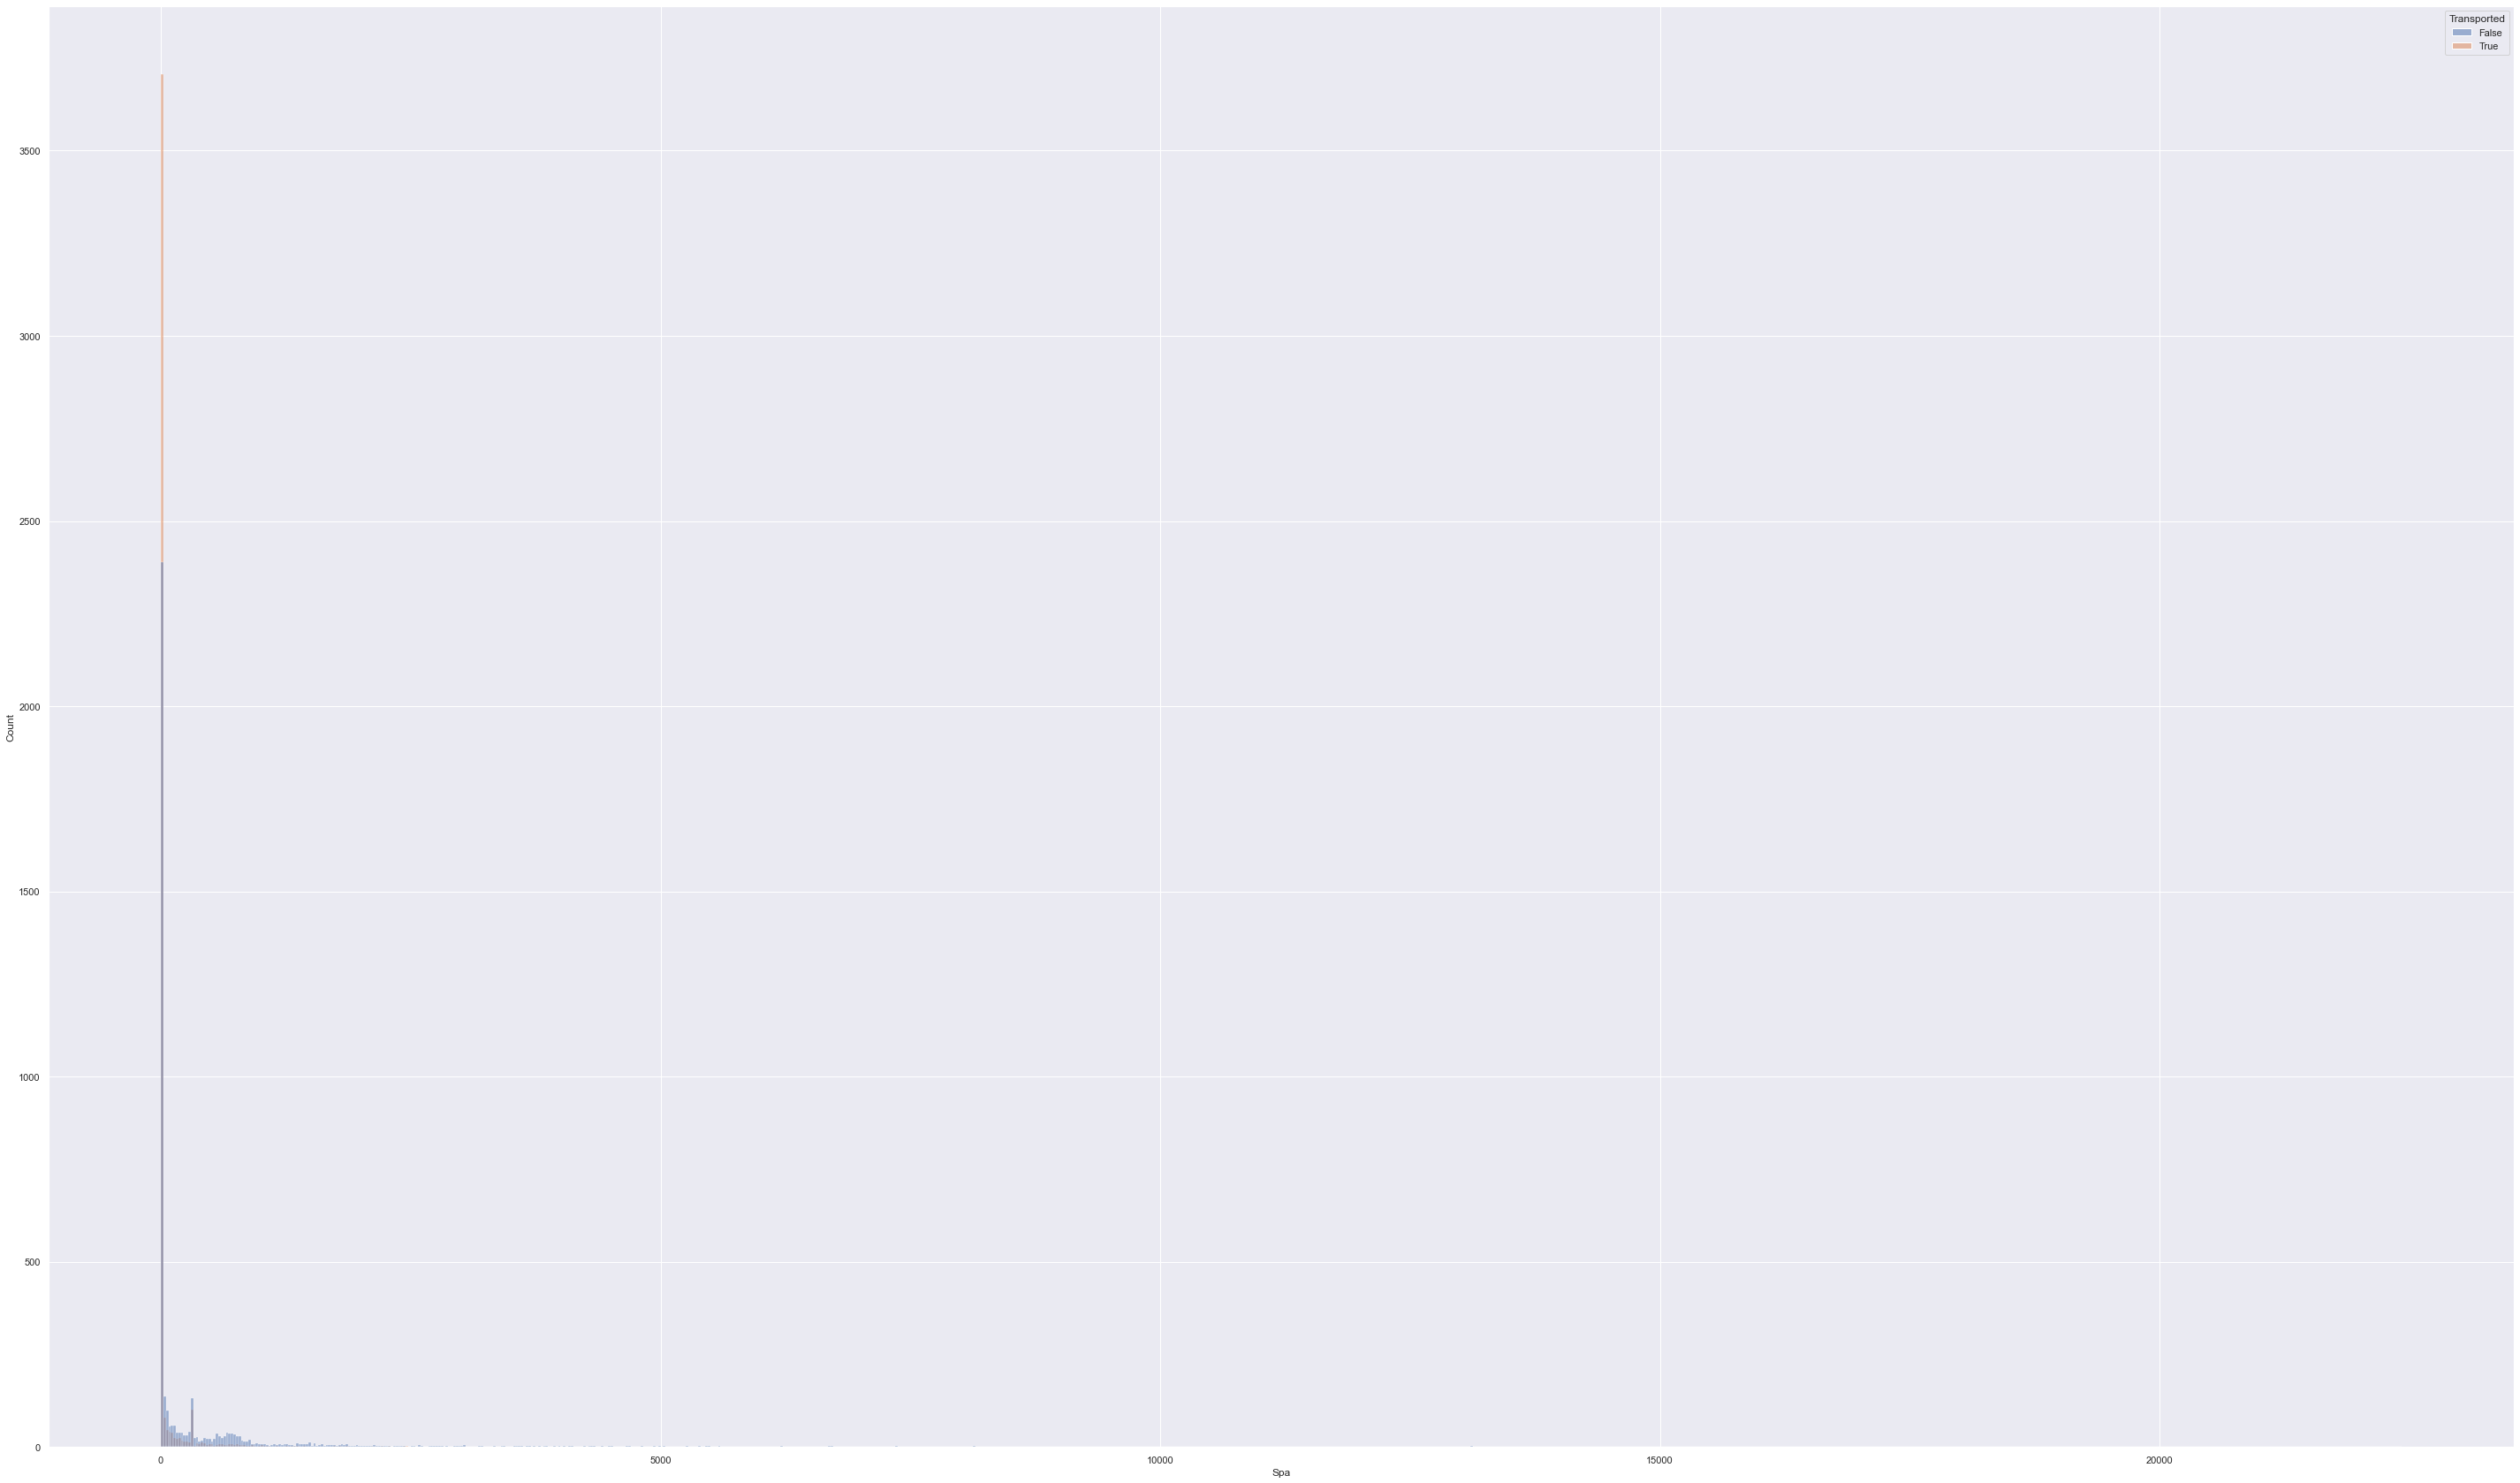

In [42]:
sns.set(rc={'figure.figsize':(50,30)})
sns.histplot(data = df, x = "Spa", hue = "Transported", stat = 'count', binwidth = 25, legend = True)
plt.show()

In [43]:
no_spa = df[df['Spa'] <=25]
no_spa['Transported'].value_counts()

True     3709
False    2397
Name: Transported, dtype: int64

In [44]:
alot_spa = df[df['Spa'] >25]
alot_spa['Transported'].value_counts()

False    1918
True      669
Name: Transported, dtype: int64

61% of all people who spent less than $25 at the Spa were transported. If you spent more than that, you were 74% likely to not be transported

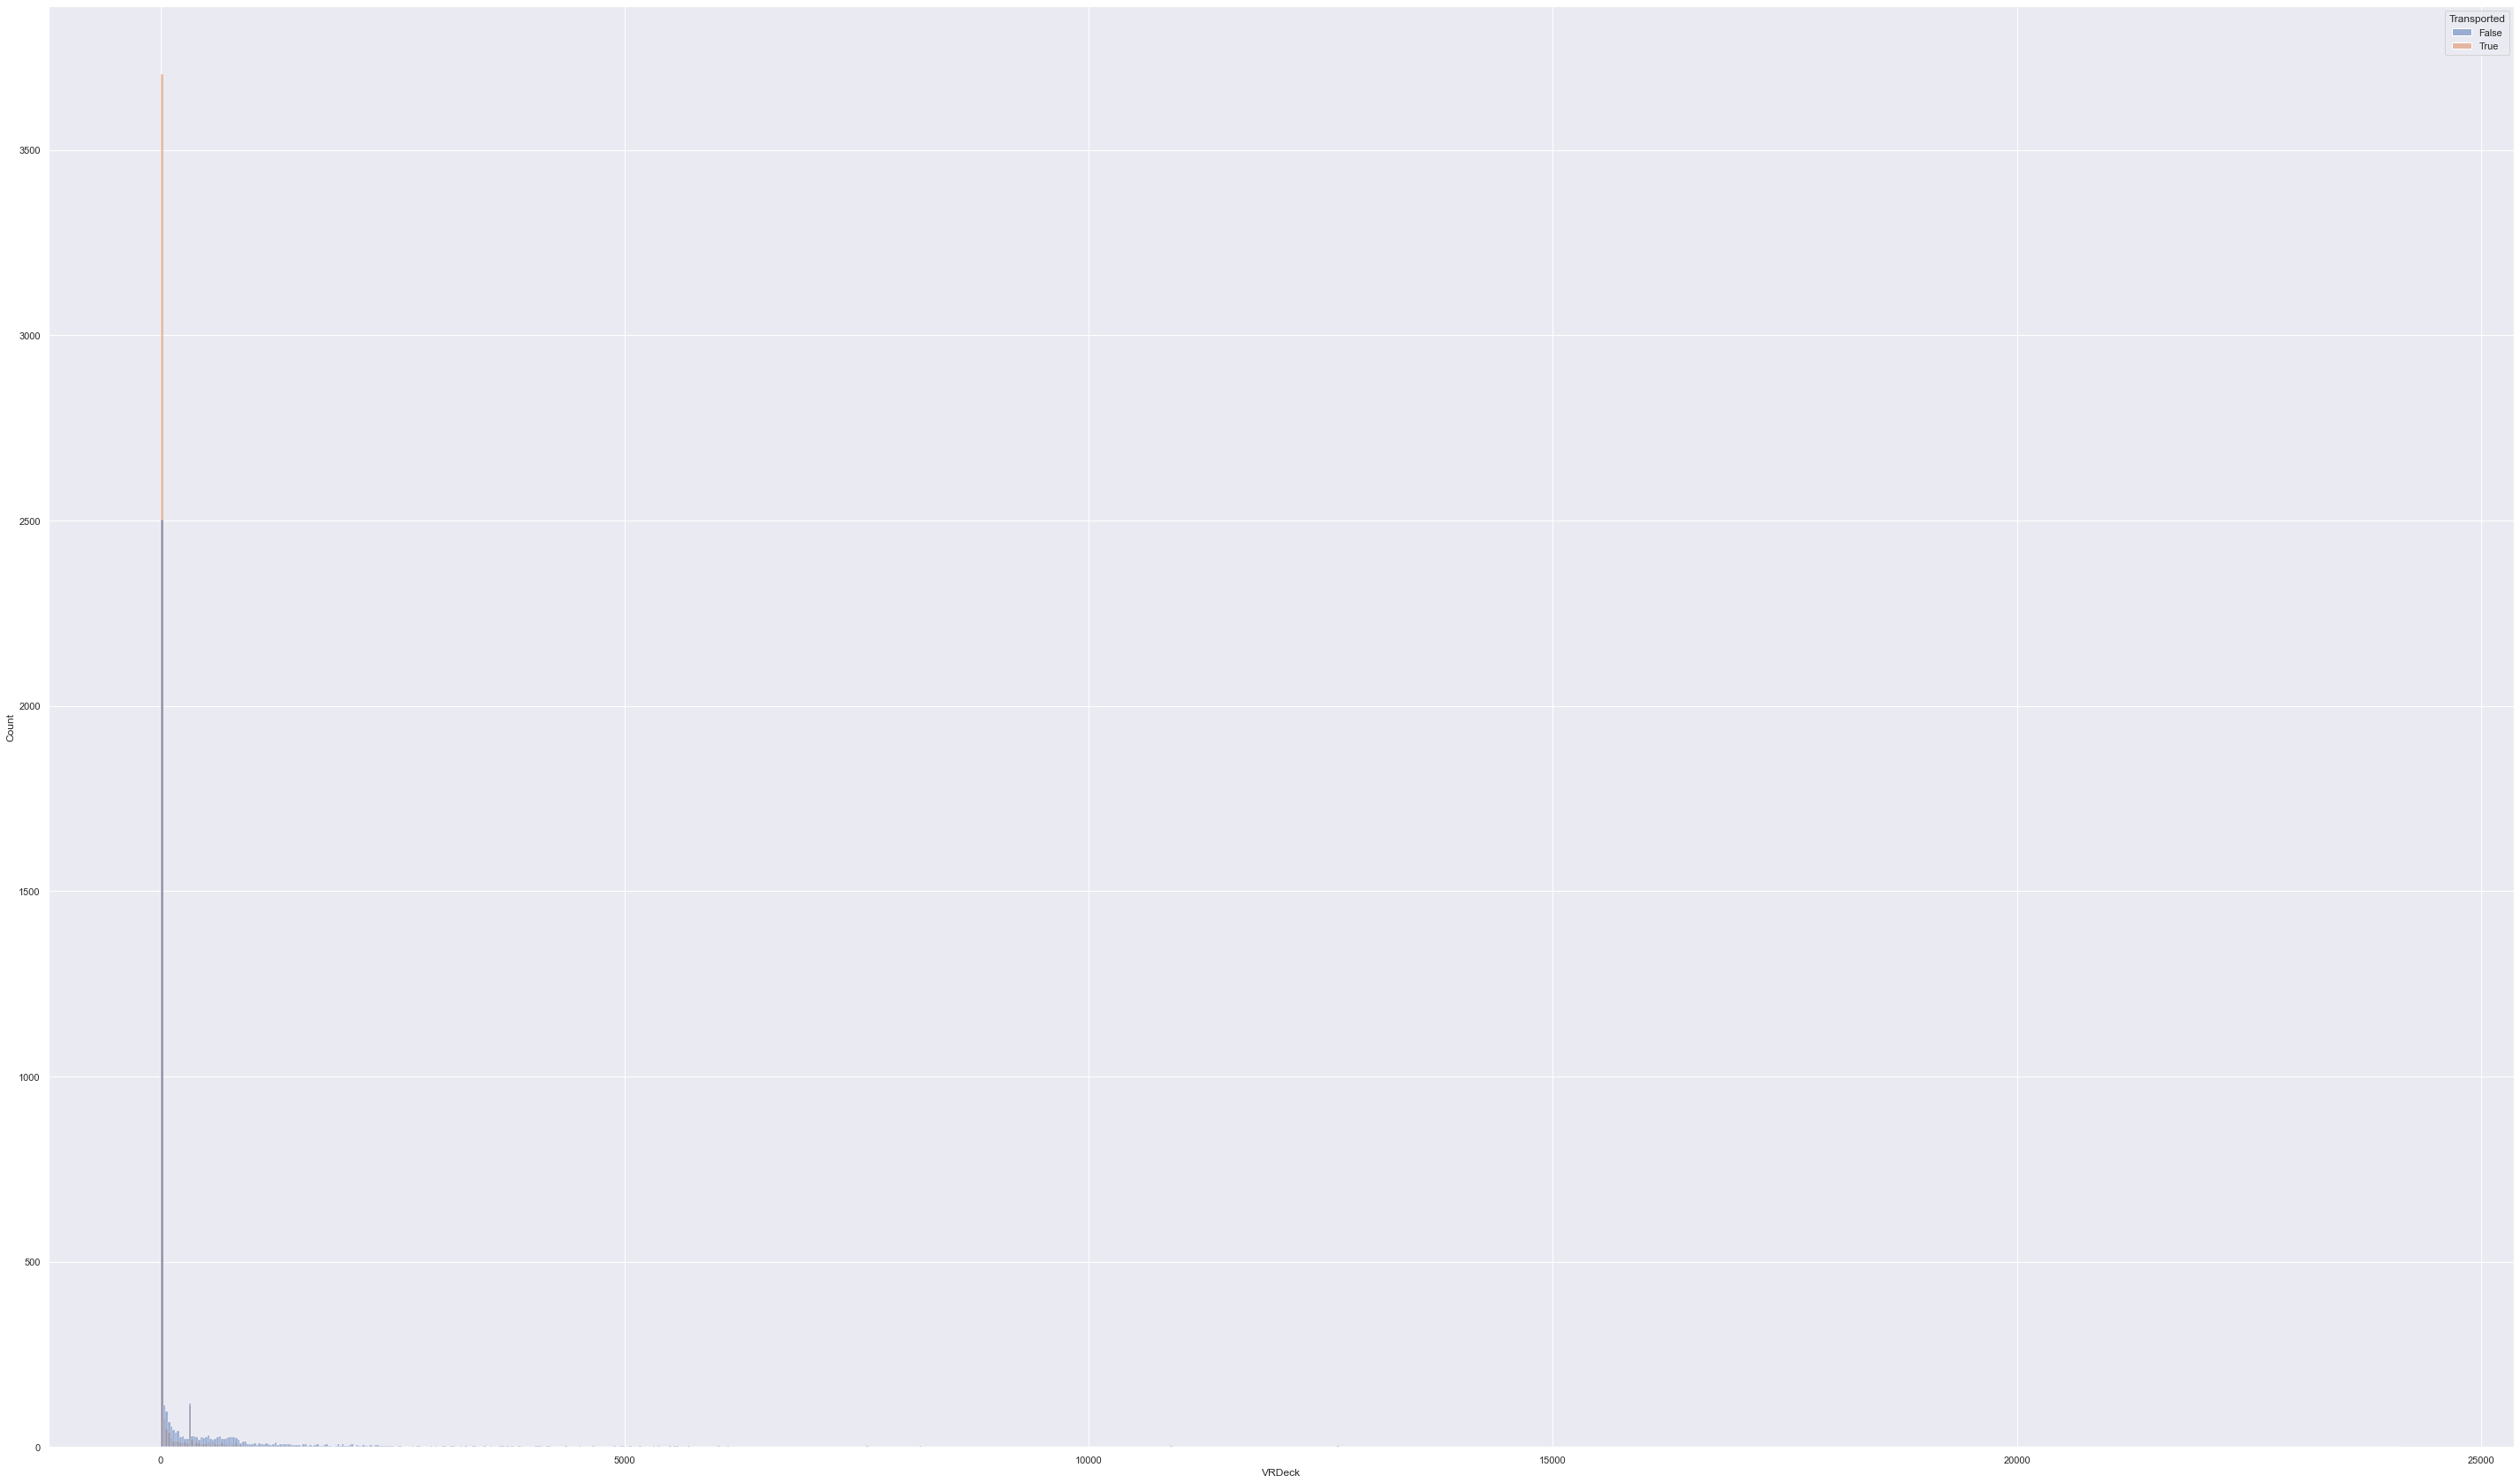

In [45]:
sns.set(rc={'figure.figsize':(50,30)})
sns.histplot(data = df, x = "VRDeck", hue = "Transported", stat = 'count', binwidth = 25, legend = True)
plt.show()

In [46]:
no_vr = df[df['VRDeck'] <=50]
no_vr['Transported'].value_counts()

True     3786
False    2618
Name: Transported, dtype: int64

In [47]:
alot_vr = df[df['VRDeck'] >50]
alot_vr['Transported'].value_counts()

False    1697
True      592
Name: Transported, dtype: int64

59% of all people who spent $50 or less got transported, while 74% of those who spent more than that amount did not get transported

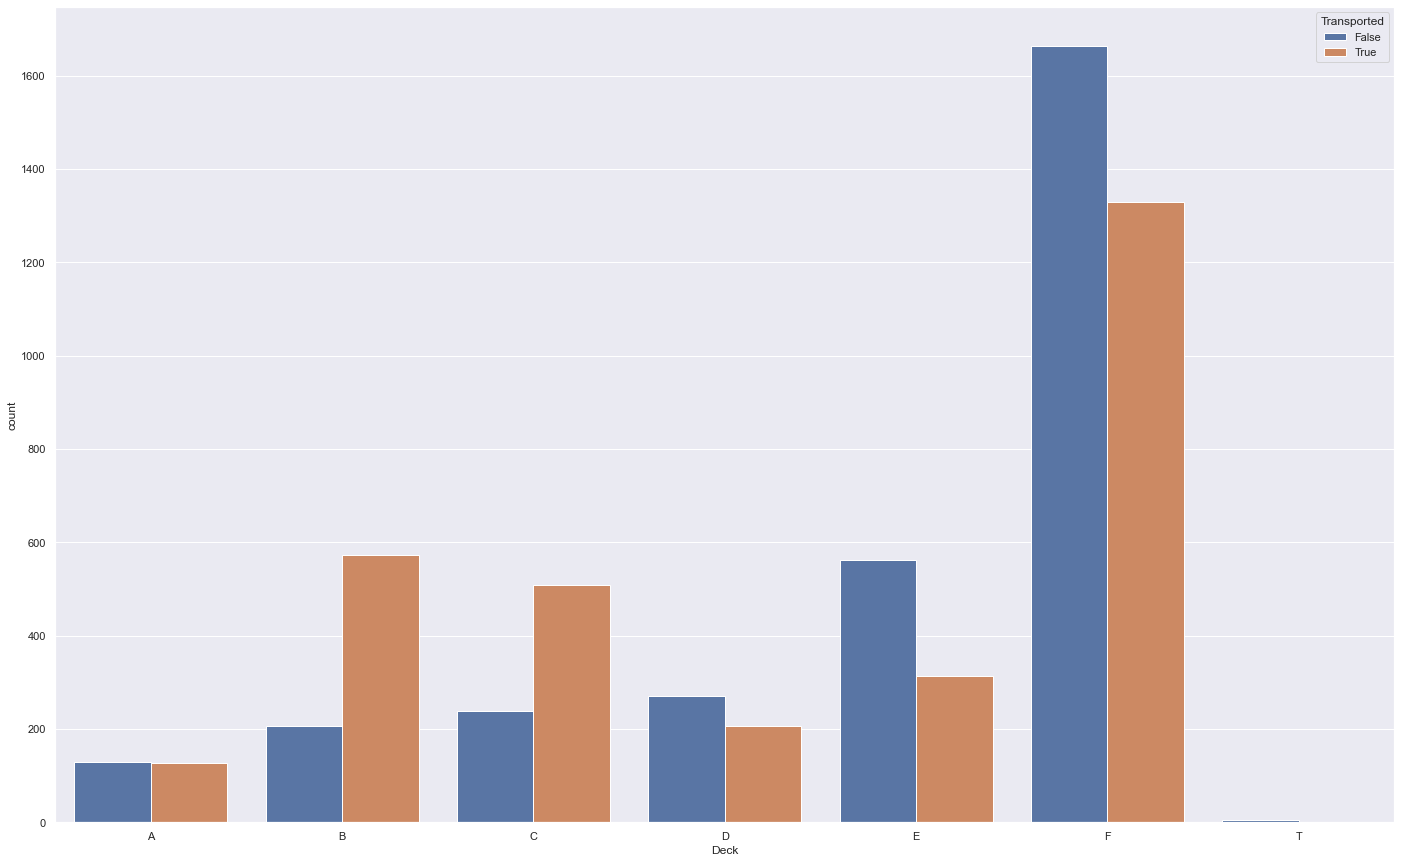

In [48]:
sns.set(rc={'figure.figsize':(24,15)})
sns.countplot(data = df, x = "Deck", hue = "Transported", order = ['A','B','C','D','E','F','T'])
plt.show()

We see that passengers on decks B and C were roughly 3x and 2x more likely to be transported than not transported. Passengers in Deck E were roughly 2X more likely to not be transported than to be transported. Decks D and F had slight bias towards not being transported. Decks A and T had no  significant difference in transport rates.

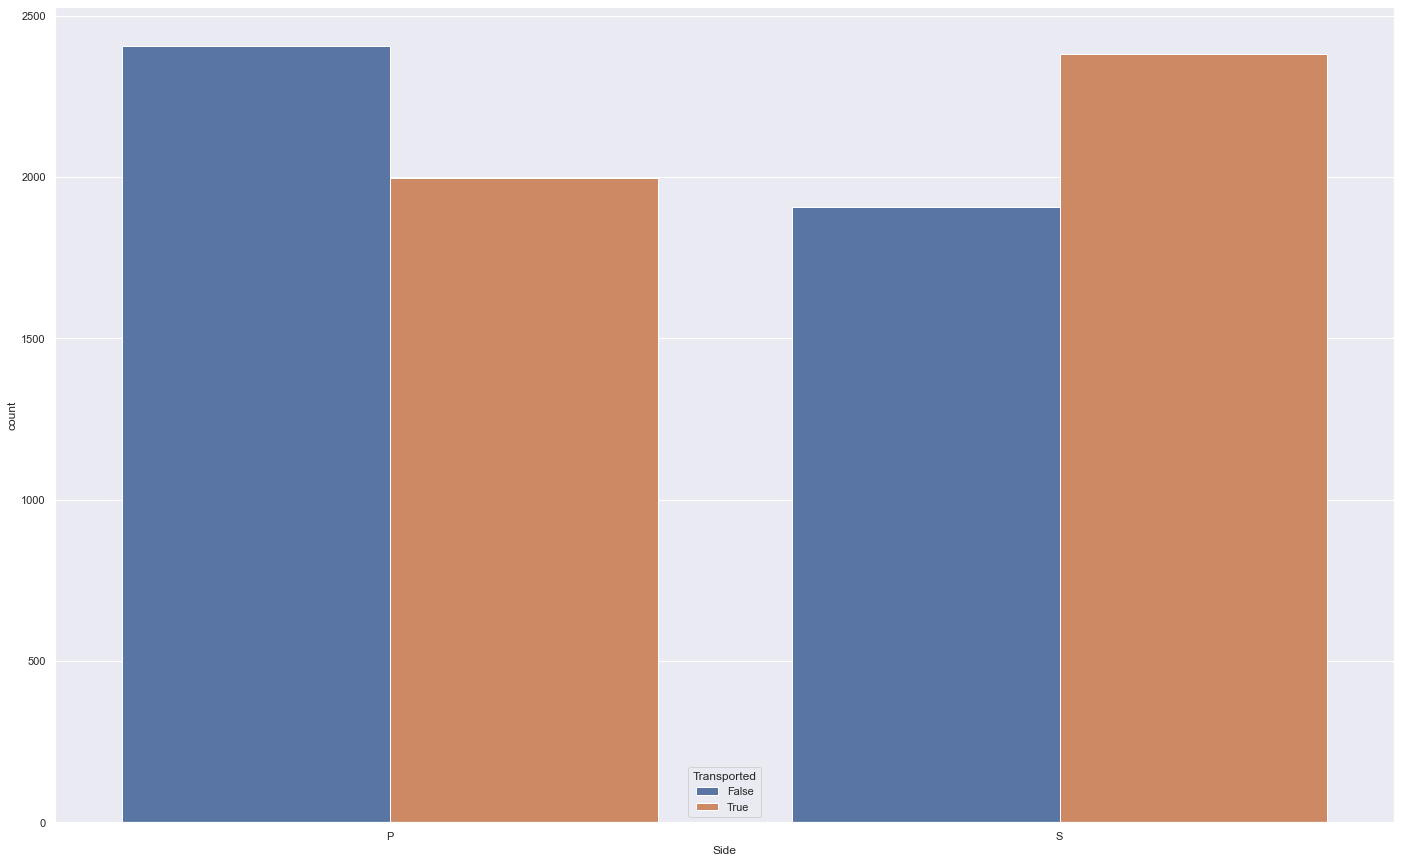

In [49]:
sns.set(rc={'figure.figsize':(24,15)})
sns.countplot(data = df, x = "Side", hue = "Transported", order = ['P','S'])
plt.show()

Portside cabins were slightly favored to not being transported. Starboard cabins were slightly favored to being transported. 